# **G2M insight for Cab Investment firm**

# Importing required libraries and reading Csv documents

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from scipy import stats
from datetime import datetime, timedelta
import seaborn as sns

In [2]:
df1 = pd.read_csv("Cab_Data.csv")
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
df2 = pd.read_csv("City.csv")
df2.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [4]:
df3 = pd.read_csv("Transaction_ID.csv")
df3.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [5]:
df4 = pd.read_csv("Customer_ID.csv")
df4.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
df5 = pd.read_csv("US Holiday Dates (2004-2021).csv")
df5.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


# Understanding data types of columns for each set

In [7]:
df1.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [8]:
df2.dtypes

City          object
Population    object
Users         object
dtype: object

In [9]:
df3.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [10]:
df4.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [11]:
df5.dtypes

Date       object
Holiday    object
WeekDay    object
Month       int64
Day         int64
Year        int64
dtype: object

# Analysing each set by their distribution etc and preparing for merging

In [12]:
df1.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [13]:
df1[df1.duplicated(['Transaction ID'], keep=False)]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip


**There is no duplicated Transaction ID in Cab_Data**

In [14]:
EXCEL_EPOCH0 = datetime(1899, 12, 31)

def from_excel_ordinal(ordinal, _epoch=EXCEL_EPOCH0):
    if ordinal >= 60:
        ordinal -= 1  # Excel / Lotus 1-2-3 leap year bug, 1900 is not a leap year!
    # Excel doesn't support microseconds, ignore them as mere fp artefacts
    return (_epoch + timedelta(days=ordinal)).replace(microsecond=0)

In [15]:
str(from_excel_ordinal(df1["Date of Travel"].min())) # min Date of Travel in string form

'2016-01-02 00:00:00'

In [16]:
from_excel_ordinal(df1["Date of Travel"].max()) # max Date of Travel

datetime.datetime(2018, 12, 31, 0, 0)

**If we want to merge tables, for example US holidays table has different date time represantation and Cab data has different representations using excel epoch and decimal values to show dates. We need to make them same type and format.**

In [17]:
def date_transform(x):
  return(str(from_excel_ordinal(x))[:10])


df1["Date of Travel"]=df1["Date of Travel"].apply(date_transform)

In [18]:
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [19]:
df5.isin(['2017-07-04']).any()

Date        True
Holiday    False
WeekDay    False
Month      False
Day        False
Year       False
dtype: bool

In [20]:
df1.isin(['2017-07-04']).any()

Transaction ID    False
Date of Travel     True
Company           False
City              False
KM Travelled      False
Price Charged     False
Cost of Trip      False
dtype: bool

In [21]:
df5.rename(columns = {'Date':'Date of Travel'}, inplace = True)

In [22]:
df5 = df5.astype({"Date of Travel": str}, errors='raise') 
df1 = df1.astype({"Date of Travel": str}, errors='raise')

In [23]:
df_master=df1.merge(df5, on="Date of Travel", how="left")
df_master.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Holiday,WeekDay,Month,Day,Year
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,NaN,NaN,NaN,NaN,NaN
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,NaN,NaN,NaN,NaN,NaN
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,NaN,NaN,NaN,NaN,NaN
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,NaN,NaN,NaN,NaN,NaN
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,NaN,NaN,NaN,NaN,NaN


In [24]:
df_master['Holiday'].isnull().sum()

340748

In [25]:
df2.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


**There is 20 data points and all of them(20/20) are unique so we don't need to use duplicated function for "City" dataset.**

In [26]:
df3.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [27]:
df3[df3.duplicated(['Transaction ID'], keep=False)]

,Transaction ID,Customer ID,Payment_Mode


**There is no duplicated Transaction ID(key value of this dataset) in this dataset which is the way it should supposed to be.**

In [28]:
df4.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [29]:
df4[df4.duplicated(['Customer ID'], keep=False)]

,Customer ID,Gender,Age,Income (USD/Month)


**There is no duplicated Customer ID(key value of this dataset) in this dataset which is the way it should supposed to be.**

In [30]:
df5.describe()

,Month,Day,Year
count,342.000000,342.000000,342.000000
mean,7.263158,15.853801,2012.500000
std,3.899889,9.653330,5.195729
min,1.000000,1.000000,2004.000000
25%,4.000000,6.000000,2008.000000
50%,9.000000,16.500000,2012.500000
75%,11.000000,24.000000,2017.000000
max,12.000000,31.000000,2021.000000


# Merging Datasets accordingly to create one master Dataset

In [31]:
df_master=df_master.merge(df2, on="City", how="left")
df_master.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Holiday,WeekDay,Month,Day,Year,Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,NaN,NaN,NaN,NaN,NaN,"814,885","24,701"
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,NaN,NaN,NaN,NaN,NaN,"814,885","24,701"
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,NaN,NaN,NaN,NaN,NaN,"814,885","24,701"
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,NaN,NaN,NaN,NaN,NaN,"814,885","24,701"
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,NaN,NaN,NaN,NaN,NaN,"814,885","24,701"


In [32]:
df_master=df_master.merge(df3, on="Transaction ID", how="left")
df_master.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Holiday,WeekDay,Month,Day,Year,Population,Users,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,NaN,NaN,NaN,NaN,NaN,"814,885","24,701",29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,NaN,NaN,NaN,NaN,NaN,"814,885","24,701",27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,NaN,NaN,NaN,NaN,NaN,"814,885","24,701",28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,NaN,NaN,NaN,NaN,NaN,"814,885","24,701",28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,NaN,NaN,NaN,NaN,NaN,"814,885","24,701",27182,Card


In [33]:
df_master=df_master.merge(df4, on="Customer ID", how="left")
df_master.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Holiday,WeekDay,Month,Day,Year,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,NaN,NaN,NaN,NaN,NaN,"814,885","24,701",29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,NaN,NaN,NaN,NaN,NaN,"814,885","24,701",27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,NaN,NaN,NaN,NaN,NaN,"814,885","24,701",28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,NaN,NaN,NaN,NaN,NaN,"814,885","24,701",28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,NaN,NaN,NaN,NaN,NaN,"814,885","24,701",27182,Card,Male,33,8536


# Performing analysis like NA value and outlier detection in Master Dataset

In [34]:
df_master.isnull().sum()

Transaction ID             0
Date of Travel             0
Company                    0
City                       0
KM Travelled               0
Price Charged              0
Cost of Trip               0
Holiday               340748
WeekDay               340748
Month                 340748
Day                   340748
Year                  340748
Population                 0
Users                      0
Customer ID                0
Payment_Mode               0
Gender                     0
Age                        0
Income (USD/Month)         0
dtype: int64

In [35]:
df_master.count()

Transaction ID        359854
Date of Travel        359854
Company               359854
City                  359854
KM Travelled          359854
Price Charged         359854
Cost of Trip          359854
Holiday                19106
WeekDay                19106
Month                  19106
Day                    19106
Year                   19106
Population            359854
Users                 359854
Customer ID           359854
Payment_Mode          359854
Gender                359854
Age                   359854
Income (USD/Month)    359854
dtype: int64

**We can see that out of 359854 cab driving information, 19106 drivings belong to days with holidays.**

In [36]:
df_master.groupby(['Company']).count()

,Transaction ID,Date of Travel,City,KM Travelled,Price Charged,Cost of Trip,Holiday,WeekDay,Month,Day,Year,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
Company,,,,,,,,,,,,,,,,,,
Pink Cab,84785,84785,84785,84785,84785,84785,4575,4575,4575,4575,4575,84785,84785,84785,84785,84785,84785,84785
Yellow Cab,275069,275069,275069,275069,275069,275069,14531,14531,14531,14531,14531,275069,275069,275069,275069,275069,275069,275069


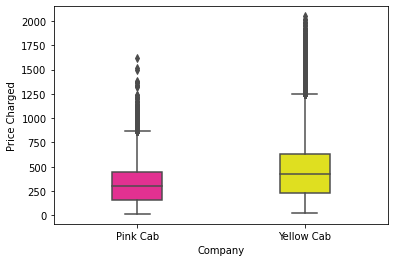

In [37]:
my_pal = {"Pink Cab": "DeepPink", "Yellow Cab": "Yellow"}
sns.boxplot(x=df_master["Company"], y=df_master["Price Charged"], width=0.3, palette=my_pal)
plt.show()

**We can see that there are too many outliers, so lets check how is the relation between KM travelled and Price charged.**

In [38]:
print(df_master['Price Charged'].corr(df_master['KM Travelled']))

0.8356170467832168


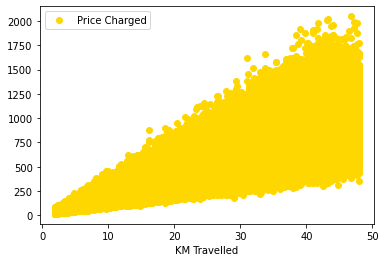

In [39]:
df_master.plot(x='KM Travelled', y='Price Charged', style='o',color="gold")

**Since there is a high correlation coefficient and we can also see visually traveling distance is one of the reasons for high prices that are charged. Also, since we do not have any further information about other causes, it is better to not treat high prices as outliers in the "Price Charged" column.**

# City based Analyses


In [40]:
df=df_master[["City","Users","Population"]]
df.drop_duplicates(keep = "first", inplace = True)
df

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,City,Users,Population
0,ATLANTA GA,"24,701","814,885"
6,AUSTIN TX,"14,978","698,371"
8,BOSTON MA,"80,021","248,968"
23,CHICAGO IL,"164,468","1,955,130"
53,DALLAS TX,"22,157","942,908"
59,DENVER CO,"12,421","754,233"
63,LOS ANGELES CA,"144,132","1,595,037"
123,MIAMI FL,"17,675","1,339,155"
126,NASHVILLE TN,"9,270","327,225"
128,NEW YORK NY,"302,149","8,405,837"


In [41]:
df['Users']=df['Users'].str.replace(',','')
df['Population']=df['Population'].str.replace(',','')
df['Users'] = df['Users'].astype(float)
df['Population'] = df['Population'].astype(float)
df["User Ratio"]=df.apply(lambda row: row["Users"] / row["Population"], axis=1)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,City,Users,Population,User Ratio
0,ATLANTA GA,24701.0,814885.0,0.030312
6,AUSTIN TX,14978.0,698371.0,0.021447
8,BOSTON MA,80021.0,248968.0,0.321411
23,CHICAGO IL,164468.0,1955130.0,0.084121
53,DALLAS TX,22157.0,942908.0,0.023499


In [42]:
df=df[["City","User Ratio"]]
df=df.sort_values('User Ratio')
df.tail()

,City,User Ratio
159,SAN DIEGO CA,0.072964
23,CHICAGO IL,0.084121
63,LOS ANGELES CA,0.090363
221,WASHINGTON DC,0.303207
8,BOSTON MA,0.321411


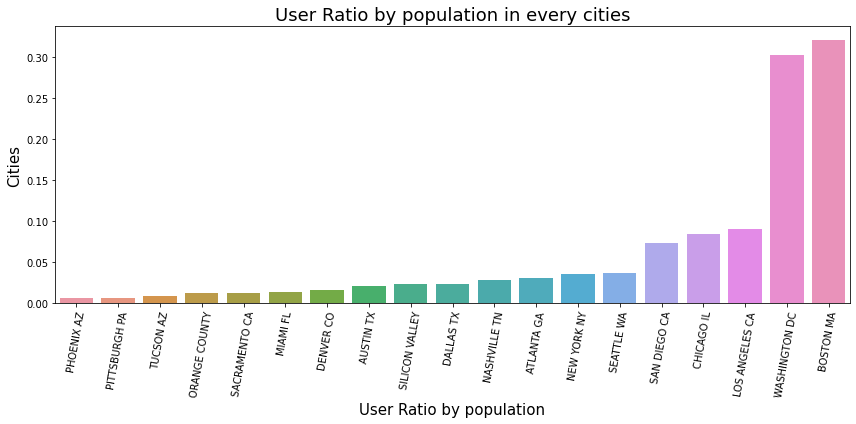

In [43]:
plt.figure(figsize=(12,6))
# make barplot and sort bars
sns.barplot(x='City',
            y="User Ratio", 
            data=df, 
            )
# set labels
plt.xlabel("User Ratio by population", size=15)
plt.xticks(rotation=80)
plt.ylabel("Cities", size=15)
plt.title("User Ratio by population in every cities", size=18)
plt.tight_layout()

**Taxi industry has almost captured 30% of the population in Washington DC and Boston MA.**

### Pink Cabs user proportion by cities

In [44]:
df_pink=df_master[df_master['Company']=="Pink Cab"]  #Total Rides of customers wich took pink cabs trough the 3 years
df_pink_rides=pd.DataFrame(df_pink.groupby("Customer ID").count()["Transaction ID"])
df_pink_rides = df_pink_rides.rename_axis('Customer ID').reset_index()
df_pink_rides.rename(columns = {'Transaction ID':'Rides'}, inplace = True)
df_pink_rides.head()

,Customer ID,Rides
0,1,4
1,2,4
2,3,6
3,4,1
4,5,8


In [45]:
df_pink_rides=df_pink_rides.merge(df_master[["City","Customer ID"]], on="Customer ID", how="inner")
df_pink_rides.drop_duplicates(keep = "first", inplace = True)
df_pink_rides.head()

,Customer ID,Rides,City
0,1,4,NEW YORK NY
29,2,4,NEW YORK NY
69,3,6,NEW YORK NY
115,4,1,NEW YORK NY
141,5,8,NEW YORK NY


In [46]:
df_pink_rides=df_pink_rides.groupby("City").count()
df_pink_rides=pd.DataFrame(df_pink_rides)
df_pink_rides = df_pink_rides.rename_axis('index1').reset_index()
df_pink_rides.drop("Customer ID", axis=1, inplace=True)
df_pink_rides.columns=["City","Number of Unique Users"]
df_pink_rides.head()

,City,Number of Unique Users
0,ATLANTA GA,1322
1,AUSTIN TX,1354
2,BOSTON MA,2463
3,CHICAGO IL,2859
4,DALLAS TX,1118


In [47]:
df_pink_rides=df_pink_rides.merge(df_master[["City","Users"]], on="City", how="inner")

df_pink_rides.drop_duplicates(keep = "first", inplace = True)
df_pink_rides['Users']=df_pink_rides['Users'].str.replace(',','')
df_pink_rides['Users']=df_pink_rides['Users'].astype(float)
df_pink_rides.head()

,City,Number of Unique Users,Users
0,ATLANTA GA,1322,24701.0
7569,AUSTIN TX,1354,14978.0
12468,BOSTON MA,2463,80021.0
42209,CHICAGO IL,2859,164468.0
98908,DALLAS TX,1118,22157.0


In [48]:
df_pink_rides["User Ratio"]=df_pink_rides.apply(lambda row: row["Number of Unique Users"] / row["Users"], axis=1)
df_pink_rides=df_pink_rides.sort_values('User Ratio')
df_pink_rides.tail()

,City,Number of Unique Users,Users,User Ratio
314110,TUCSON AZ,684,5712.0,0.119748
271315,PHOENIX AZ,763,6133.0,0.124409
164312,NASHVILLE TN,1356,9270.0,0.146278
274693,SACRAMENTO CA,1078,7044.0,0.153038
273380,PITTSBURGH PA,604,3643.0,0.165797


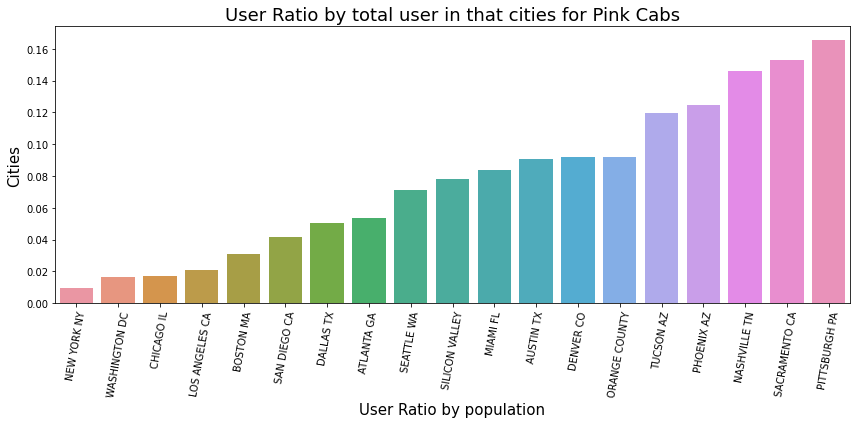

In [49]:
plt.figure(figsize=(12,6))
# make barplot and sort bars
sns.barplot(x='City',
            y="User Ratio", 
            data=df_pink_rides, 
            )
# set labels
plt.xlabel("User Ratio by population", size=15)
plt.xticks(rotation=80)
plt.ylabel("Cities", size=15)
plt.title("User Ratio by total user in that cities for Pink Cabs", size=18)
plt.tight_layout()

In [50]:
df_pink_rides["User Ratio"].mean()

0.07675298102277388

**On average pink cabs has the 7.6% of the total users where they have service for stated cities.**

## Yellow Cabs user proportion by cities

In [51]:
df_yellow=df_master[df_master['Company']=="Yellow Cab"]  #Total Rides of customers wich took yellow cabs trough the 3 years
df_yellow_rides=pd.DataFrame(df_yellow.groupby("Customer ID").count()["Transaction ID"])
df_yellow_rides = df_yellow_rides.rename_axis('Customer ID').reset_index()
df_yellow_rides.rename(columns = {'Transaction ID':'Rides'}, inplace = True)

df_yellow_rides=df_yellow_rides.merge(df_master[["City","Customer ID"]], on="Customer ID", how="inner")
df_yellow_rides.drop_duplicates(keep = "first", inplace = True)
df_yellow_rides=df_yellow_rides.groupby("City").count()
df_yellow_rides=pd.DataFrame(df_yellow_rides)
df_yellow_rides = df_yellow_rides.rename_axis('index1').reset_index()
df_yellow_rides.drop("Customer ID", axis=1, inplace=True)
df_yellow_rides.columns=["City","Number of Unique Users"]
df_yellow_rides=df_yellow_rides.merge(df_master[["City","Users"]], on="City", how="inner")

df_yellow_rides.drop_duplicates(keep = "first", inplace = True)
df_yellow_rides['Users']=df_yellow_rides['Users'].str.replace(',','')
df_yellow_rides['Users']=df_yellow_rides['Users'].astype(float)

df_yellow_rides["User Ratio"]=df_yellow_rides.apply(lambda row: row["Number of Unique Users"] / row["Users"], axis=1)
df_yellow_rides=df_yellow_rides.sort_values('User Ratio')
df_yellow_rides.tail()

,City,Number of Unique Users,Users,User Ratio
157851,MIAMI FL,2334,17675.0,0.132051
105932,DENVER CO,1681,12421.0,0.135335
273380,PITTSBURGH PA,574,3643.0,0.157562
271315,PHOENIX AZ,994,6133.0,0.162074
314110,TUCSON AZ,934,5712.0,0.163515


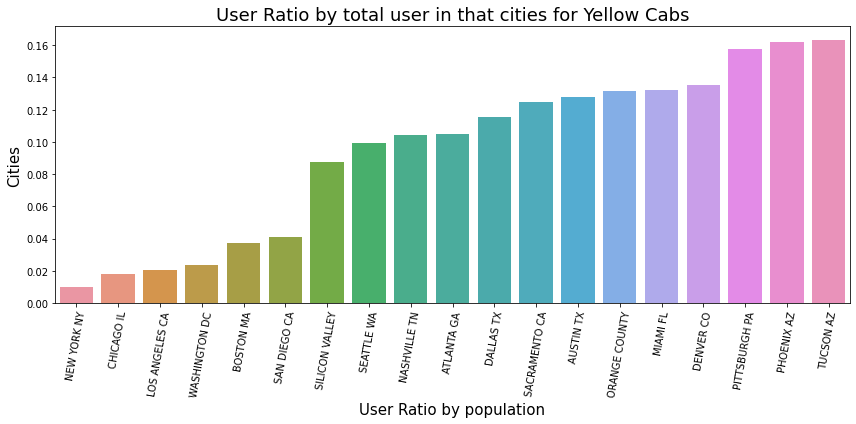

In [52]:
plt.figure(figsize=(12,6))
# make barplot and sort bars
sns.barplot(x='City',
            y="User Ratio", 
            data=df_yellow_rides, 
            )
# set labels
plt.xlabel("User Ratio by population", size=15)
plt.xticks(rotation=80)
plt.ylabel("Cities", size=15)
plt.title("User Ratio by total user in that cities for Yellow Cabs", size=18)
plt.tight_layout()

**For both Yellow and Pink Cabs the cities that have least user proportion is common, they are "New York NY", "Chicago IL", "Los Angeles CA", "Washington DC", "Boston MA" and "Sandiego CA". Assuming that these are very crowded and big cities and competition by other companies are also a very big threat.**

In [53]:
df_yellow_rides["User Ratio"].mean()

0.09461955118668781

**On average pink cabs has the 9.4% of the total users where they have service for stated cities.**

# Rides vs Days of the week analysis

In [54]:
df_date_yellow= df_master[df_master['Company'] == "Yellow Cab"]["Date of Travel"]
df_date_yellow=df_date_yellow.groupby(df_date_yellow).count()
df_date_yellow=pd.DataFrame(df_date_yellow)
df_date_yellow = df_date_yellow.rename_axis('index1').reset_index()
df_date_yellow.columns=["Date of Travel","Number of Rides"]
df_date_yellow.head()

,Date of Travel,Number of Rides
0,2016-01-02,140
1,2016-01-03,126
2,2016-01-04,21
3,2016-01-05,41
4,2016-01-06,86


In [55]:
df_date_pink= df_master[df_master['Company'] == "Pink Cab"]["Date of Travel"]
df_date_pink=df_date_pink.groupby(df_date_pink).count()
df_date_pink=pd.DataFrame(df_date_pink)
df_date_pink = df_date_pink.rename_axis('index1').reset_index()
df_date_pink.columns=["Date of Travel","Number of Rides"]
df_date_pink.head()

,Date of Travel,Number of Rides
0,2016-01-02,41
1,2016-01-03,52
2,2016-01-04,4
3,2016-01-05,6
4,2016-01-06,23


In [56]:
import calendar

def add_day_of_week(x):
  x=datetime.fromisoformat(x)
  return(calendar.day_name[x.weekday()])

df_date_pink["WeekDay"]=df_date_pink["Date of Travel"].apply(add_day_of_week)

df_date_yellow["WeekDay"]=df_date_yellow["Date of Travel"].apply(add_day_of_week)
df_date_yellow.head()



,Date of Travel,Number of Rides,WeekDay
0,2016-01-02,140,Saturday
1,2016-01-03,126,Sunday
2,2016-01-04,21,Monday
3,2016-01-05,41,Tuesday
4,2016-01-06,86,Wednesday


In [57]:
df_date_yellow.drop("Date of Travel", axis=1, inplace=True)
df_date_yellow=df_date_yellow.groupby(df_date_yellow["WeekDay"]).sum()
df_date_yellow=df_date_yellow.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df_date_yellow

,Number of Rides
WeekDay,
Monday,22705
Tuesday,22783
Wednesday,23026
Thursday,30198
Friday,62153
Saturday,59981
Sunday,54223


In [58]:
df_date_pink.drop("Date of Travel", axis=1, inplace=True)
df_date_pink=df_date_pink.groupby(df_date_pink["WeekDay"]).sum()
df_date_pink=df_date_pink.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df_date_pink

,Number of Rides
WeekDay,
Monday,7032
Tuesday,7077
Wednesday,7076
Thursday,9549
Friday,19249
Saturday,18253
Sunday,16549


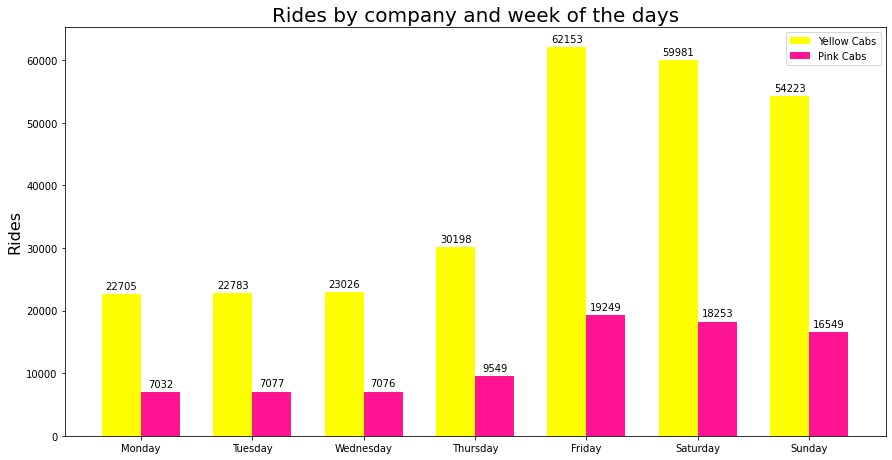

In [59]:
yellow_rides = df_date_yellow['Number of Rides'].tolist()
pink_rides = df_date_pink['Number of Rides'].tolist()

x = np.arange(7)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
rects1 = ax.bar(x - width/2, yellow_rides, width, label='Yellow Cabs',color="yellow")
rects2 = ax.bar(x + width/2, pink_rides, width, label='Pink Cabs',color="deeppink")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rides',size=16)
ax.set_title('Rides by company and week of the days',size=20)
ax.set_xticks(x)

ax.set_xticklabels(('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Seasonality analysis

In [60]:
df_date_yellow= df_master[df_master['Company'] == "Yellow Cab"]["Date of Travel"]
df_date_yellow

233       2016-01-02
234       2016-01-09
235       2016-01-03
236       2016-01-06
237       2016-01-07
             ...    
359849    2018-01-08
359850    2018-01-04
359851    2018-01-05
359852    2018-01-05
359853    2018-01-02
Name: Date of Travel, Length: 275069, dtype: object

In [61]:
def remove_day(x):
  return(str(x)[:7])


df_date_yellow=df_date_yellow.apply(remove_day)
df_date_yellow.head()

233    2016-01
234    2016-01
235    2016-01
236    2016-01
237    2016-01
Name: Date of Travel, dtype: object

In [62]:
df_date_yellow=df_date_yellow.groupby(df_date_yellow).count()
df_date_yellow=pd.DataFrame(df_date_yellow)
df_date_yellow.head()

,Date of Travel
Date of Travel,
2016-01,3719
2016-02,4674
2016-03,5146
2016-04,5360
2016-05,5967


In [63]:
df_date_yellow = df_date_yellow.rename_axis('index1').reset_index()

In [64]:
df_date_yellow.head()

,index1,Date of Travel
0,2016-01,3719
1,2016-02,4674
2,2016-03,5146
3,2016-04,5360
4,2016-05,5967


In [65]:
df_date_yellow.columns=["Date of Travel","Number of Passengers"]
df_date_yellow.head()

,Date of Travel,Number of Passengers
0,2016-01,3719
1,2016-02,4674
2,2016-03,5146
3,2016-04,5360
4,2016-05,5967


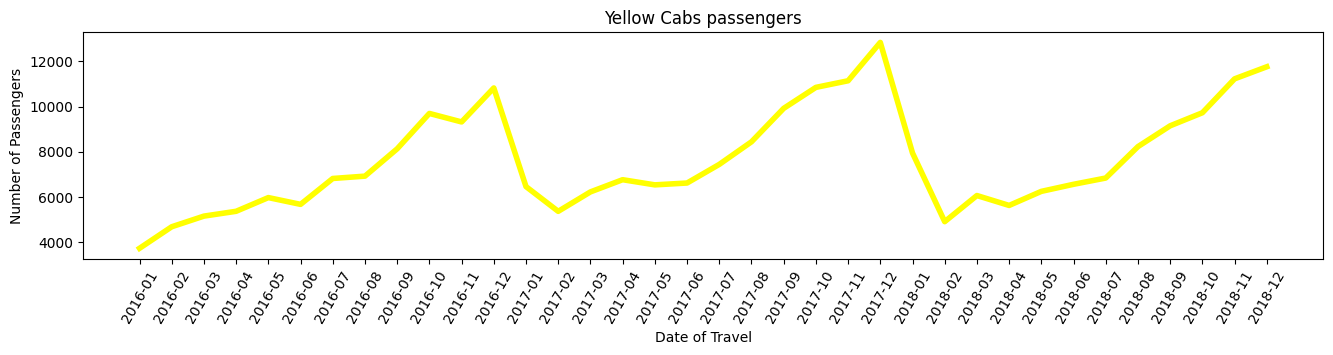

In [66]:
def plot_df(clr,df, x, y, title="", xlabel='Date of Travel', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(16,3), dpi=dpi)
    plt.plot(x, y, color=clr,linewidth=4)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=60)
    
    plt.show()
    

plot_df('yellow',df_date_yellow, x=df_date_yellow['Date of Travel'], y=df_date_yellow['Number of Passengers'], title='Yellow Cabs passengers')

In [67]:
df_date_pink= df_master[df_master['Company'] == "Pink Cab"]["Date of Travel"]
df_date_pink=df_date_pink.apply(remove_day)
df_date_pink=df_date_pink.groupby(df_date_pink).count()
df_date_pink=pd.DataFrame(df_date_pink)
df_date_pink = df_date_pink.rename_axis('index1').reset_index()
df_date_pink.columns=["Date of Travel","Number of Passengers"]
df_date_pink.head()

,Date of Travel,Number of Passengers
0,2016-01,927
1,2016-02,1050
2,2016-03,1231
3,2016-04,1240
4,2016-05,1567


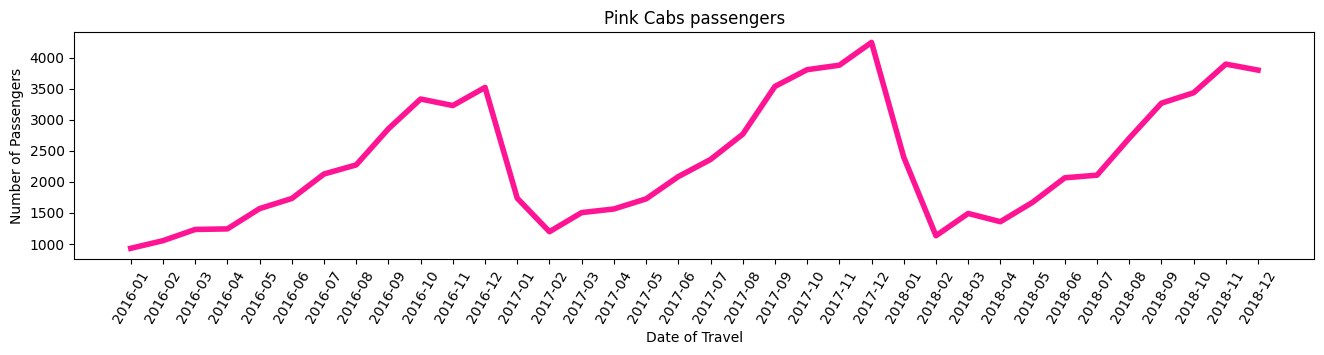

In [68]:
plot_df("deeppink",df_date_pink, x=df_date_pink['Date of Travel'], y=df_date_pink['Number of Passengers'], title='Pink Cabs passengers')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


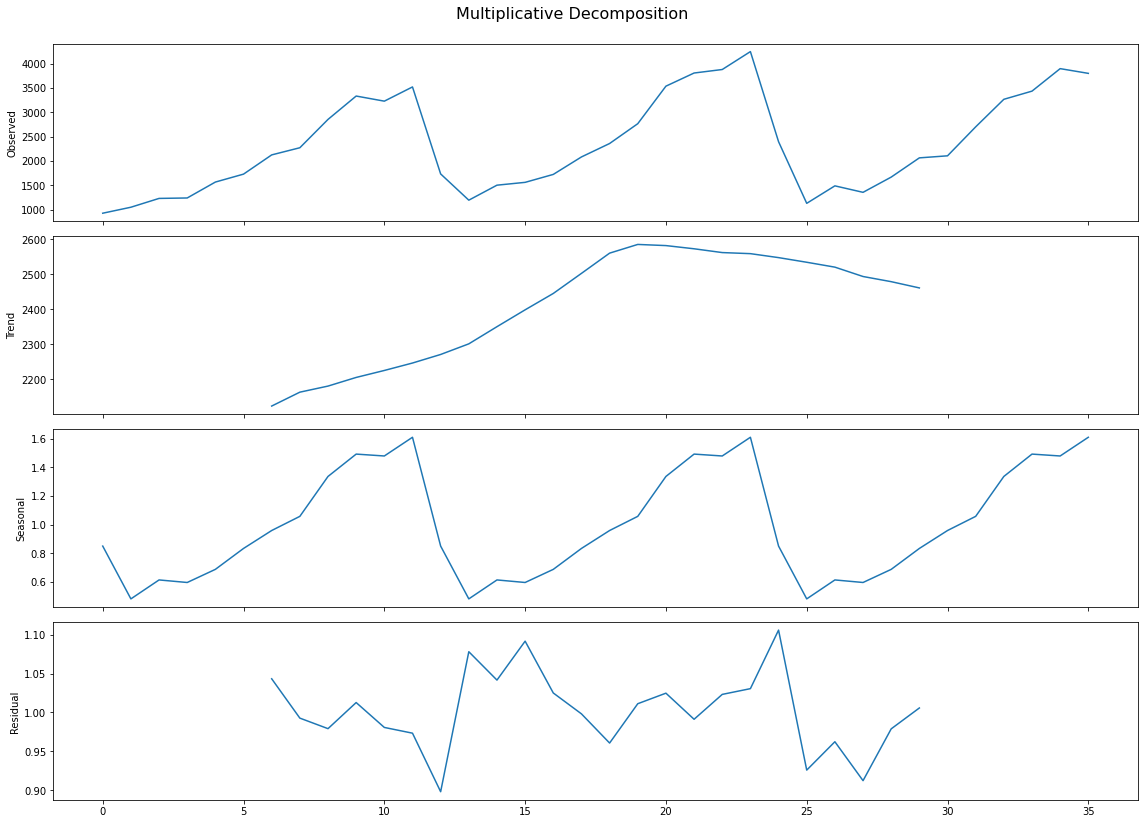

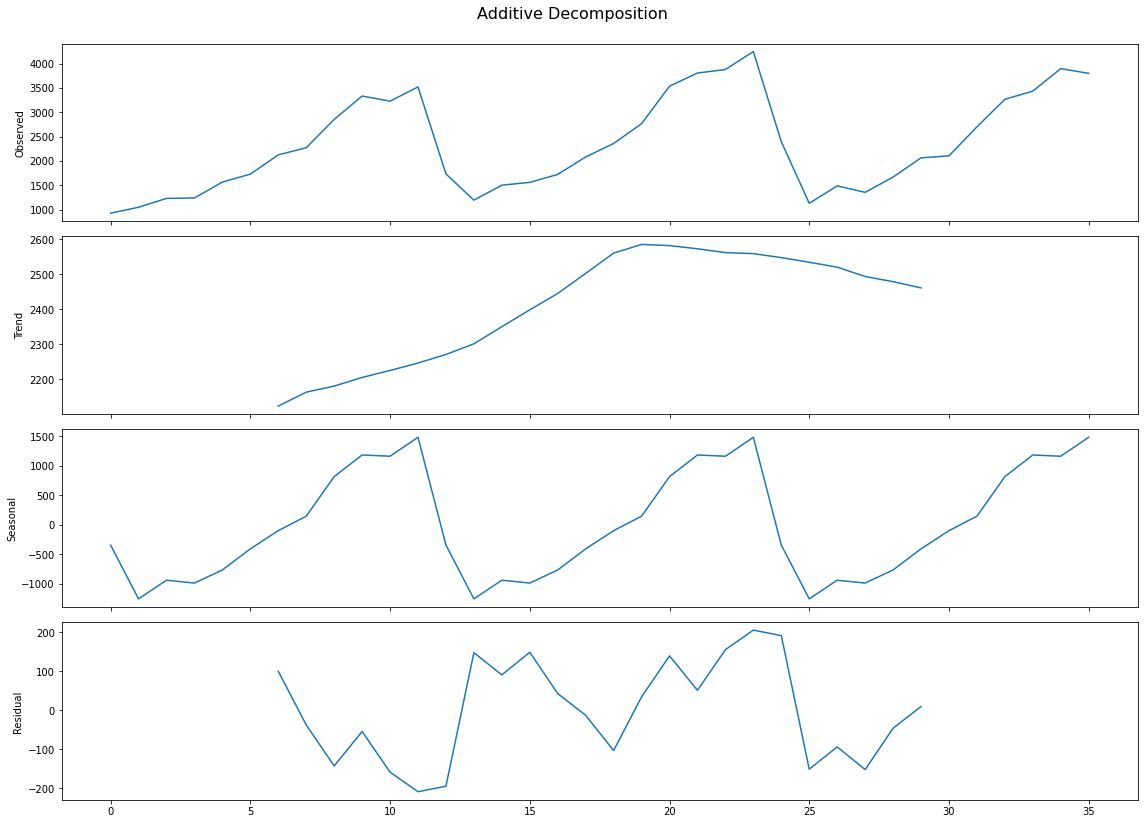

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df_date_pink['Number of Passengers'], model='multiplicative',freq=12)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df_date_pink['Number of Passengers'], model='additive',freq=12)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

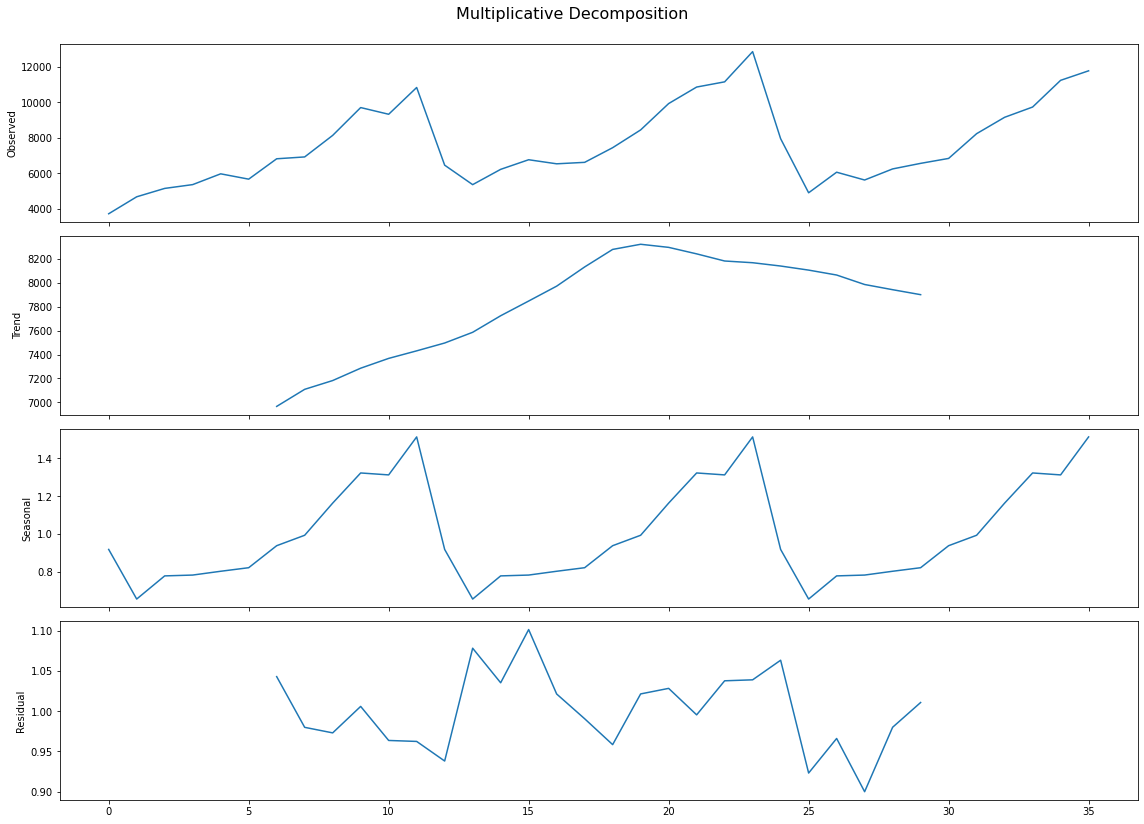

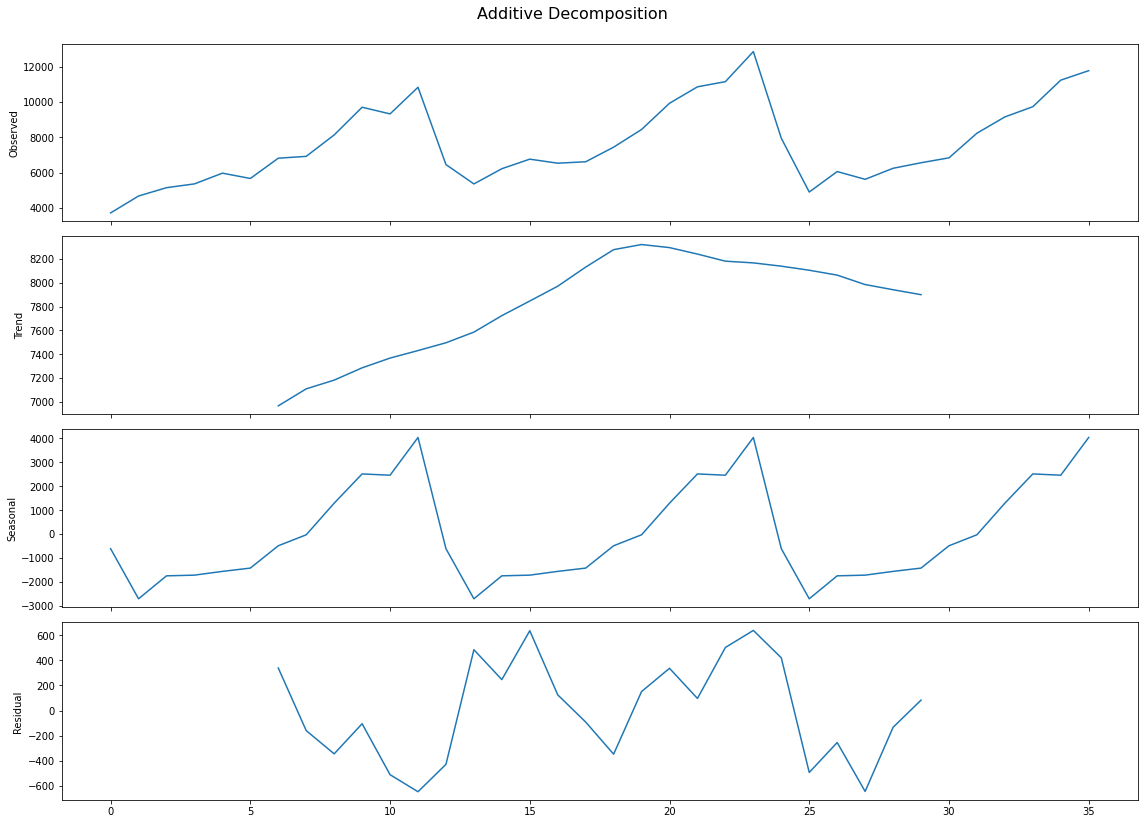

In [70]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df_date_yellow['Number of Passengers'], model='multiplicative',freq=12)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df_date_yellow['Number of Passengers'], model='additive',freq=12)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

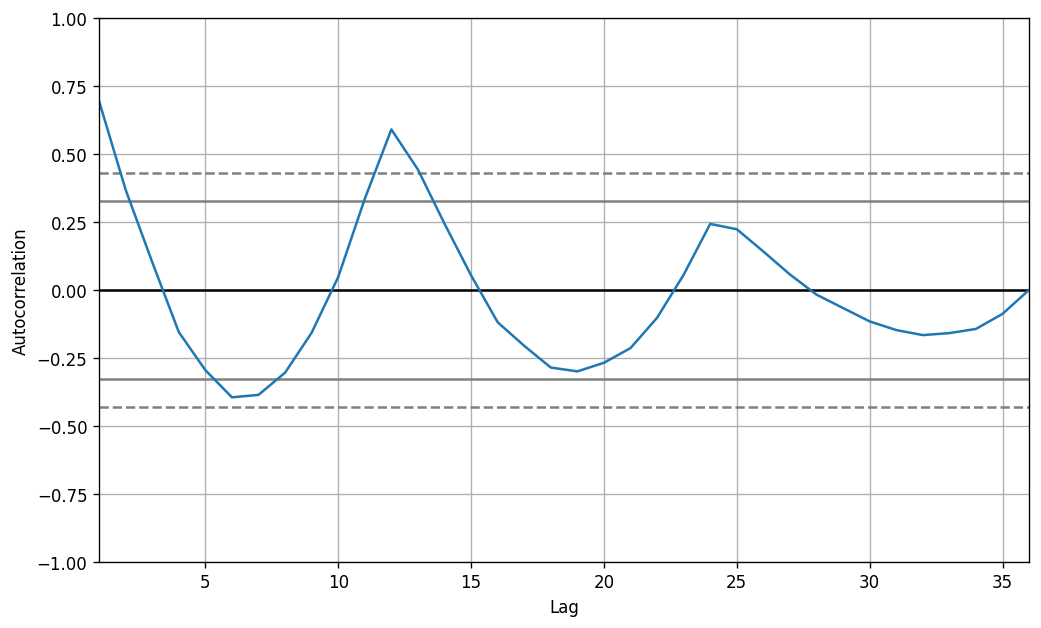

In [71]:
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df_date_yellow['Number of Passengers'].tolist())

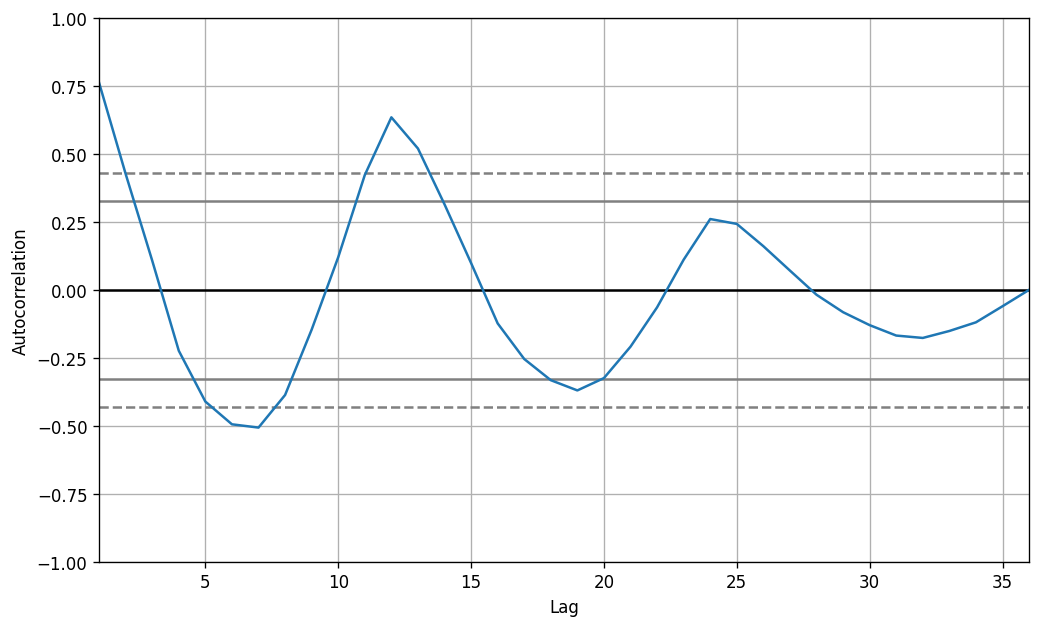

In [72]:
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df_date_pink['Number of Passengers'].tolist())

**There is just a little difference between yellow cabs and pink cabs seasonality according to autocorrelation test.**

In [73]:
new = df_date_yellow["Date of Travel"].str.split("-", n = 1, expand = True)
df_date_yellow["Year"]= new[0]
df_date_yellow["Month"]= new[1]
df_date_yellow.head()

,Date of Travel,Number of Passengers,Year,Month
0,2016-01,3719,2016,01
1,2016-02,4674,2016,02
2,2016-03,5146,2016,03
3,2016-04,5360,2016,04
4,2016-05,5967,2016,05


In [74]:
new = df_date_pink["Date of Travel"].str.split("-", n = 1, expand = True)
df_date_pink["Year"]= new[0]
df_date_pink["Month"]= new[1]
df_date_pink.head()

,Date of Travel,Number of Passengers,Year,Month
0,2016-01,927,2016,01
1,2016-02,1050,2016,02
2,2016-03,1231,2016,03
3,2016-04,1240,2016,04
4,2016-05,1567,2016,05


In [75]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df_date_yellow[['Number of Passengers', 'Month']], maxlag=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.0768 , p=0.0033  , df_denom=32, df_num=1
ssr based chi2 test:   chi2=11.0215 , p=0.0009  , df=1
likelihood ratio test: chi2=9.5816  , p=0.0020  , df=1
parameter F test:         F=10.0768 , p=0.0033  , df_denom=32, df_num=1


{1: ({'lrtest': (9.581618952449617, 0.001965350271476796, 1),
   'params_ftest': (10.076796818481686, 0.0033109649819980293, 32.0, 1.0),
   'ssr_chi2test': (11.02149652021433, 0.0009006133287278936, 1),
   'ssr_ftest': (10.076796818481673, 0.003310964981998038, 32.0, 1)},
   array([[0., 1., 0.]])])}

**In the above case, the p-values are close to 0("zero") for all tests. So the ‘month’ indeed can be used to forecast the values for yellow cabs.**

In [76]:
grangercausalitytests(df_date_pink[['Number of Passengers', 'Month']], maxlag=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.1813  , p=0.0183  , df_denom=32, df_num=1
ssr based chi2 test:   chi2=6.7608  , p=0.0093  , df=1
likelihood ratio test: chi2=6.1813  , p=0.0129  , df=1
parameter F test:         F=6.1813  , p=0.0183  , df_denom=32, df_num=1


{1: ({'lrtest': (6.181344737709878, 0.012910412151924618, 1),
   'params_ftest': (6.181295627867169, 0.01832082328270945, 32.0, 1.0),
   'ssr_chi2test': (6.760792092979714, 0.009318238920797996, 1),
   'ssr_ftest': (6.181295627867167, 0.018320823282709543, 32.0, 1)},
   array([[0., 1., 0.]])])}

**In the above case, the p-values are close to 0("zero") for all tests. So the ‘month’ indeed can be used to forecast the values for pink cabs.**

# Forecasting


In [77]:
from fbprophet import Prophet
from pandas import to_datetime

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds         yhat   yhat_lower   yhat_upper
0 2019-01-01  1657.536416  1493.565888  1832.617889
1 2019-02-01  1278.269083  1112.534860  1456.680996
2 2019-03-01  1499.127443  1327.573051  1673.941756
3 2019-04-01  1378.394179  1195.957409  1549.621091
4 2019-05-01  1624.460430  1455.663762  1787.898489


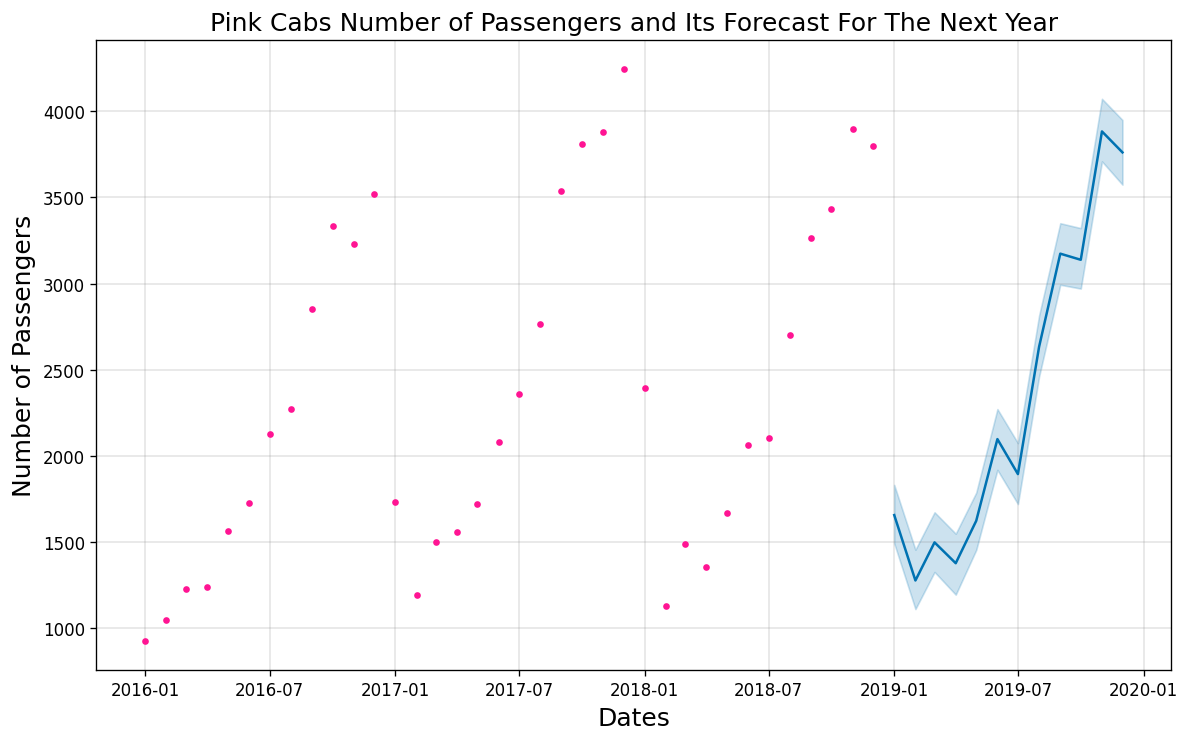

In [79]:
df=df_date_pink[["Date of Travel",'Number of Passengers']]
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '2019-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
plt.gca().get_lines()[0].set_color("deeppink")
plt.title("Pink Cabs Number of Passengers and Its Forecast For The Next Year", size=15)
plt.xlabel("Dates", size=15)
plt.ylabel("Number of Passengers", size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds         yhat   yhat_lower   yhat_upper
0 2019-01-01  5763.493554  5256.585780  6250.630636
1 2019-02-01  5242.642415  4765.633120  5695.737538
2 2019-03-01  6165.458783  5641.086612  6646.249759
3 2019-04-01  5710.999703  5201.715697  6188.601593
4 2019-05-01  6021.379391  5574.710566  6534.337265


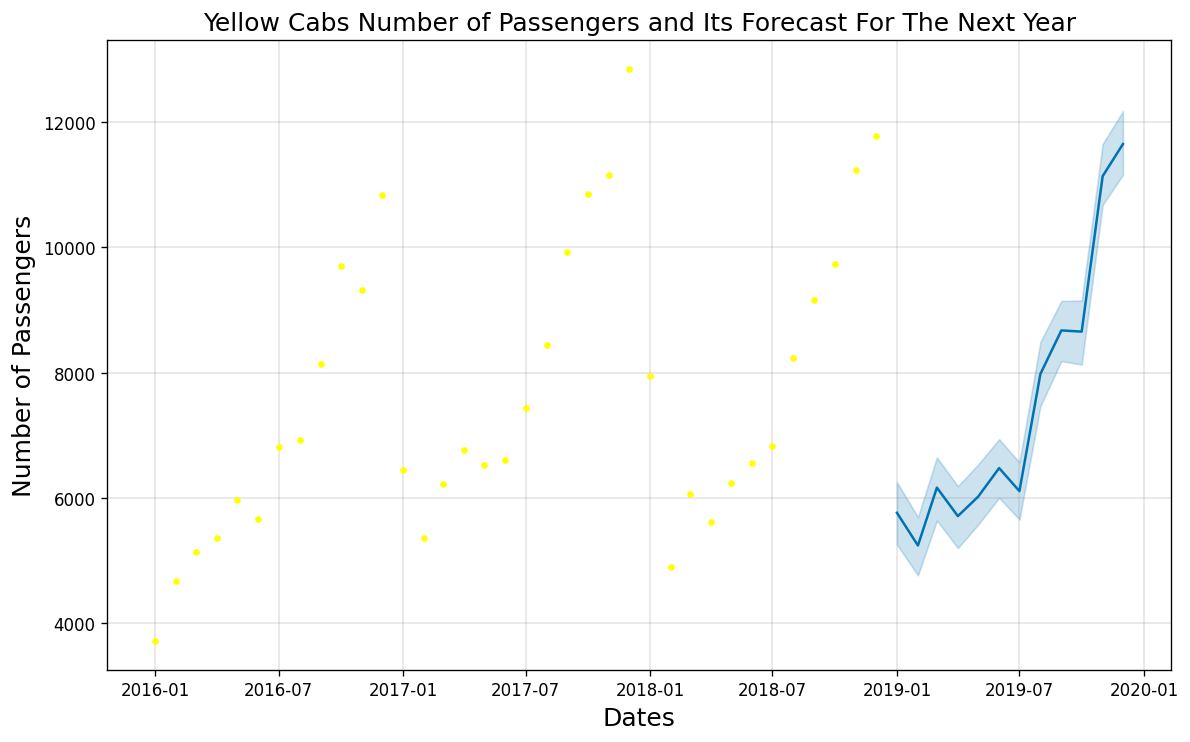

In [80]:
df=df_date_yellow[["Date of Travel",'Number of Passengers']]
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '2019-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
plt.gca().get_lines()[0].set_color("yellow")
plt.title("Yellow Cabs Number of Passengers and Its Forecast For The Next Year", size=15)
plt.xlabel("Dates", size=15)
plt.ylabel("Number of Passengers", size=15)
plt.show()

# Relation between profit and rides/customers

## Pink Cabs

In [81]:
df_master['Profit'] = df_master['Price Charged'] - df_master['Cost of Trip']
df_master["Profit"]

0         57.3150
1         23.6660
2         27.5680
3         25.7980
4         16.8440
           ...   
359849     5.8800
359850     6.9020
359851    87.4200
359852    32.1420
359853    13.9608
Name: Profit, Length: 359854, dtype: float64

In [82]:
df= df_master[df_master['Company'] == "Yellow Cab"]
df=df[["KM Travelled","Profit"]]
df["Profit per KM travelled"]=df.apply(lambda row: row["Profit"] / row["KM Travelled"], axis=1)
df["Profit per KM travelled"].describe()


count    275069.000000
mean          7.108899
std           5.795268
min          -4.998235
25%           2.601836
50%           5.603738
75%          10.890952
max          41.115556
Name: Profit per KM travelled, dtype: float64

In [83]:
df_profit_pink= df_master[df_master['Company'] == "Pink Cab"][["Profit","Date of Travel"]]

df_profit_pink["Date of Travel"]=df_profit_pink["Date of Travel"].apply(remove_day)
df_profit_pink=df_profit_pink.groupby(df_profit_pink["Date of Travel"]).sum()

df_profit_pink=pd.DataFrame(df_profit_pink)
df_profit_pink = df_profit_pink.rename_axis('Date of Travel').reset_index()
df_profit_pink.head()

,Date of Travel,Profit
0,2016-01,73952.863
1,2016-02,87475.544
2,2016-03,87801.183
3,2016-04,82591.853
4,2016-05,61550.958


In [84]:
df_profit_pink=df_profit_pink.merge(df_date_pink, on="Date of Travel", how="inner")
df_profit_pink.head()

,Date of Travel,Profit,Number of Passengers,Year,Month
0,2016-01,73952.863,927,2016,01
1,2016-02,87475.544,1050,2016,02
2,2016-03,87801.183,1231,2016,03
3,2016-04,82591.853,1240,2016,04
4,2016-05,61550.958,1567,2016,05


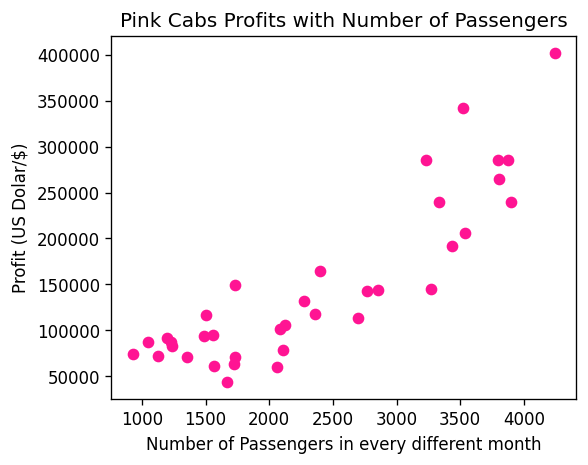

In [95]:
fig = plt.figure()
fig.set_size_inches(5,4)
plt.scatter(df_profit_pink["Number of Passengers"],df_profit_pink["Profit"],color ="deeppink")
plt.title("Pink Cabs Profits with Number of Passengers")
plt.xlabel("Number of Passengers in every different month")
plt.ylabel("Profit (US Dolar/$)")
plt.show()

In [88]:
print(df_profit_pink['Number of Passengers'].corr(df_profit_pink['Profit']))

0.8708327849907296


**As we can see from the visual representation and correlation value between Number of Passengers vs Profits, there is a significant positive trend when we looked at the pink cabs data by looking by month by month.**

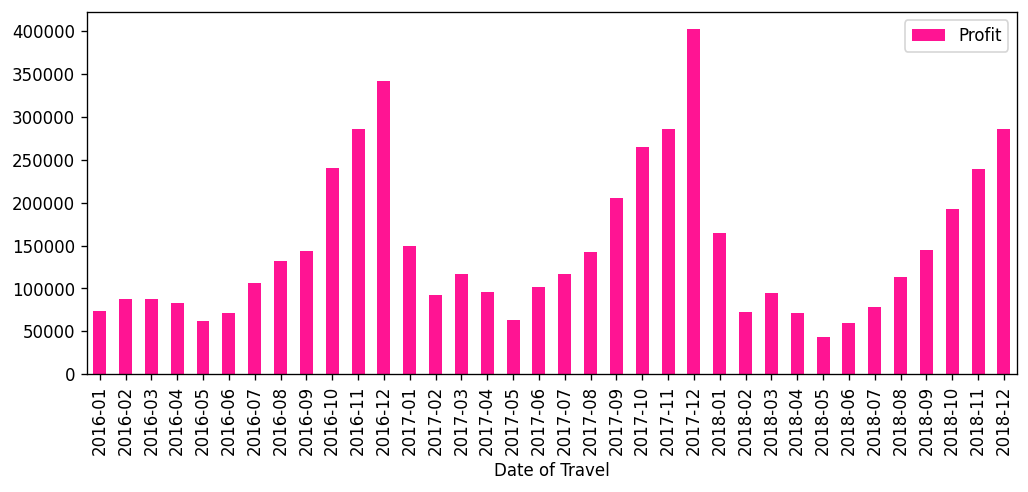

In [94]:
df_profit_pink.plot(x="Date of Travel", y="Profit", kind="bar", color="deeppink", figsize=(10,4))

In [91]:
df_profit_pink["Profit per Ride"]=df_profit_pink.apply(lambda row: row["Profit"] / row["Number of Passengers"], axis=1)
df_profit_pink.head()

,Date of Travel,Profit,Number of Passengers,Year,Month,Profit per Ride
0,2016-01,73952.863,927,2016,01,79.776551
1,2016-02,87475.544,1050,2016,02,83.310042
2,2016-03,87801.183,1231,2016,03,71.325088
3,2016-04,82591.853,1240,2016,04,66.606333
4,2016-05,61550.958,1567,2016,05,39.279488


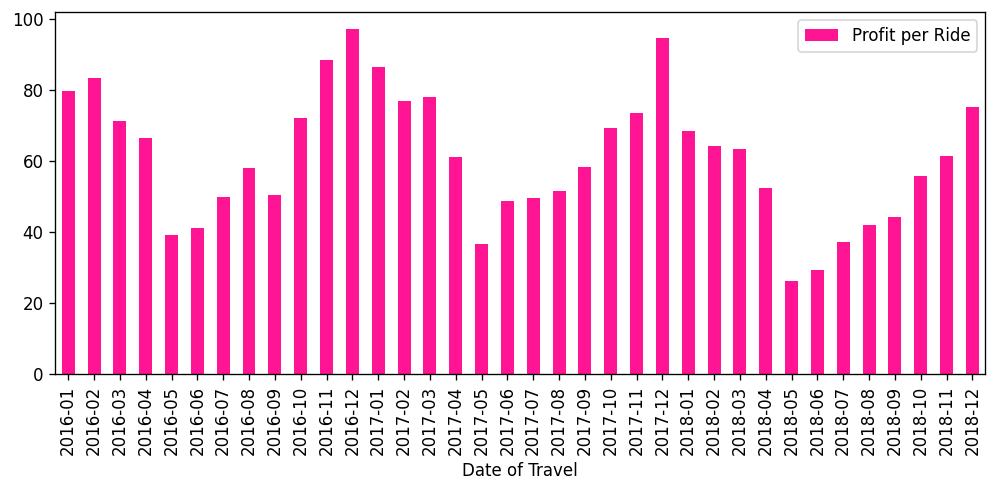

In [93]:
df_profit_pink.plot(x="Date of Travel", y="Profit per Ride", kind="bar", color="deeppink", figsize=(10,4))

Lets find the profit per km

In [96]:
df_km_pink= df_master[df_master['Company'] == "Pink Cab"][["Date of Travel","KM Travelled"]]
df_km_pink["Date of Travel"]=df_km_pink["Date of Travel"].apply(remove_day)
df_km_pink=df_km_pink.groupby(df_km_pink["Date of Travel"]).sum()
df_km_pink=pd.DataFrame(df_km_pink)
df_km_pink = df_km_pink.rename_axis('Date of Travel').reset_index()
df_km_pink.head()

,Date of Travel,KM Travelled
0,2016-01,21018.83
1,2016-02,23419.84
2,2016-03,27893.78
3,2016-04,27357.38
4,2016-05,35137.83


In [97]:
df_profit_pink=df_profit_pink.merge(df_km_pink, on="Date of Travel", how="inner")
df_profit_pink.head()

,Date of Travel,Profit,Number of Passengers,Year,Month,Profit per Ride,KM Travelled
0,2016-01,73952.863,927,2016,01,79.776551,21018.83
1,2016-02,87475.544,1050,2016,02,83.310042,23419.84
2,2016-03,87801.183,1231,2016,03,71.325088,27893.78
3,2016-04,82591.853,1240,2016,04,66.606333,27357.38
4,2016-05,61550.958,1567,2016,05,39.279488,35137.83


In [98]:
df_profit_pink["Profit per KM travelled"]=df_profit_pink.apply(lambda row: row["Profit"] / row["KM Travelled"], axis=1)
df_profit_pink.head()

,Date of Travel,Profit,Number of Passengers,Year,Month,Profit per Ride,KM Travelled,Profit per KM travelled
0,2016-01,73952.863,927,2016,01,79.776551,21018.83,3.518410
1,2016-02,87475.544,1050,2016,02,83.310042,23419.84,3.735104
2,2016-03,87801.183,1231,2016,03,71.325088,27893.78,3.147698
3,2016-04,82591.853,1240,2016,04,66.606333,27357.38,3.018997
4,2016-05,61550.958,1567,2016,05,39.279488,35137.83,1.751701


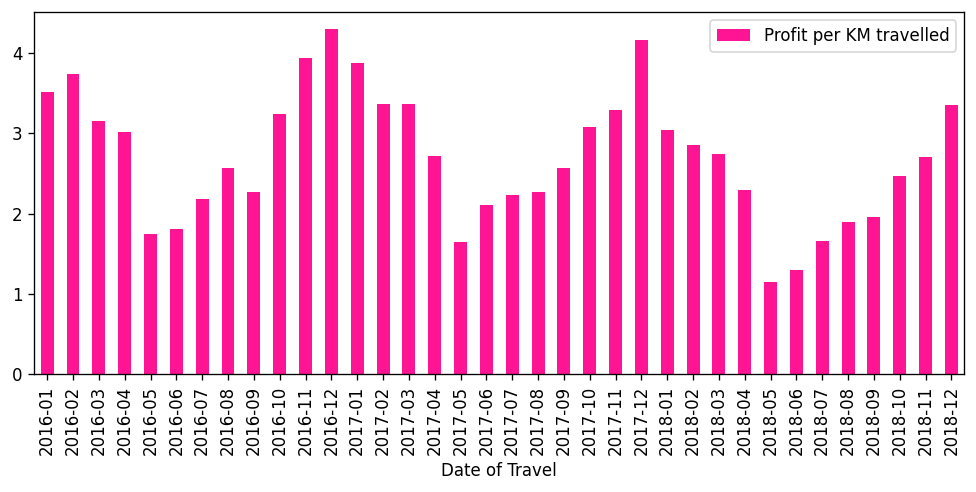

In [101]:
df_profit_pink.plot(x="Date of Travel", y="Profit per KM travelled", kind="bar", color="deeppink", figsize=(10,4))

**We can see that in 4th 5th and 6th months profit margin is decrasing in terms of both travel distance and also per ride. Even there is not a decrease in user or customers number.**

## Yellow Cabs


In [102]:
df_profit_yellow= df_master[df_master['Company'] == "Yellow Cab"][["Profit","Date of Travel"]]
df_profit_yellow["Date of Travel"]=df_profit_yellow["Date of Travel"].apply(remove_day)
df_profit_yellow=df_profit_yellow.groupby(df_profit_yellow["Date of Travel"]).sum()

df_profit_yellow=pd.DataFrame(df_profit_yellow)
df_profit_yellow = df_profit_yellow.rename_axis('Date of Travel').reset_index()
df_profit_yellow.head()

,Date of Travel,Profit
0,2016-01,8.363081e+05
1,2016-02,1.009169e+06
2,2016-03,9.147648e+05
3,2016-04,9.461364e+05
4,2016-05,1.282773e+06


In [103]:
df_profit_yellow=df_profit_yellow.merge(df_date_yellow, on="Date of Travel", how="inner")
df_profit_yellow.head()

,Date of Travel,Profit,Number of Passengers,Year,Month
0,2016-01,8.363081e+05,3719,2016,01
1,2016-02,1.009169e+06,4674,2016,02
2,2016-03,9.147648e+05,5146,2016,03
3,2016-04,9.461364e+05,5360,2016,04
4,2016-05,1.282773e+06,5967,2016,05


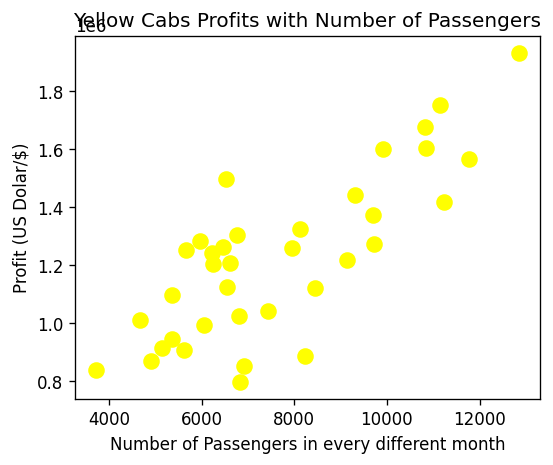

In [105]:
fig = plt.figure()
fig.set_size_inches(5,4)
plt.scatter(df_profit_yellow["Number of Passengers"],df_profit_yellow["Profit"],color ="yellow",s=80)
plt.title("Yellow Cabs Profits with Number of Passengers")
plt.xlabel("Number of Passengers in every different month")
plt.ylabel("Profit (US Dolar/$)")
plt.show()

In [106]:
print(df_profit_yellow['Number of Passengers'].corr(df_profit_yellow['Profit']))

0.7922565400048117


**As we can see from the visual representation and correlation value between Number of Passengers vs Profits, there is a significant positive trend when we looked at the yellow cabs data by looking by month by month. But it is lower when we compare with pink cabs (0.87 vs 0.79)**

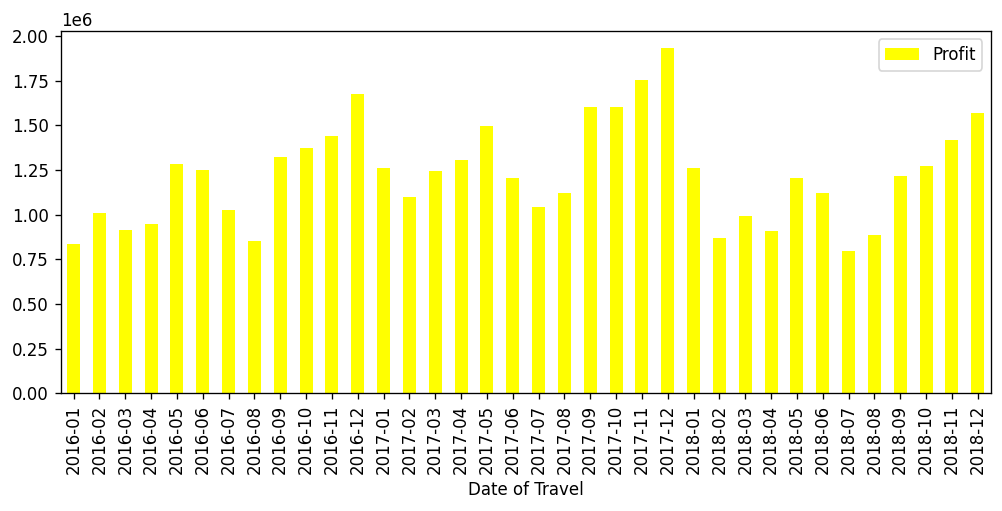

In [108]:
df_profit_yellow.plot(x="Date of Travel", y="Profit", kind="bar", color="yellow", figsize=(10,4))

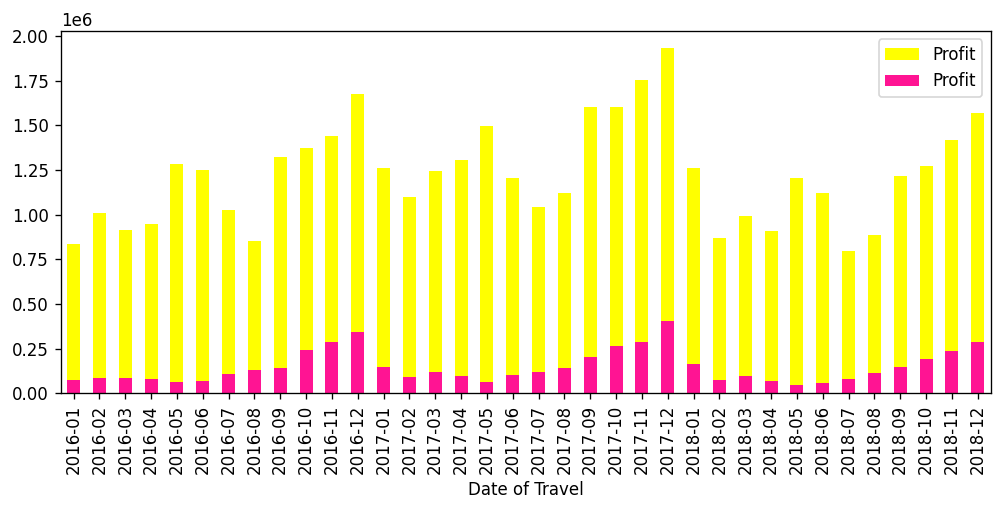

In [109]:
ax=df_profit_yellow.plot(x="Date of Travel", y="Profit", kind="bar", color="yellow", figsize=(10,4))
df_profit_pink.plot(ax=ax,x="Date of Travel", y="Profit", kind="bar", color="deeppink", figsize=(10,4))

In [110]:
print("Average profit per month for Yellow cabs: ")
print(df_profit_yellow["Profit"].mean())
print("Average profit per month for Pink cabs: ")
print(df_profit_pink["Profit"].mean())
print("Ratio between them Yellows/Pinks: ")
print(df_profit_yellow["Profit"].mean()/df_profit_pink["Profit"].mean())

print("Total profit for Yellow cabs: ")
print(df_profit_yellow["Profit"].sum())
print("Total profit for Pink cabs: ")
print(df_profit_pink["Profit"].sum())

Average profit per month for Yellow cabs: 
1225128.3623222222
Average profit per month for Pink cabs: 
147522.07672222223
Ratio between them Yellows/Pinks: 
8.304712010183307
Total profit for Yellow cabs: 
44104621.04360001
Total profit for Pink cabs: 
5310794.762


**Yellow cabs have much more profitability in total when they are compared with pink ones.**

In [111]:
df_profit_yellow["Profit per Ride"]=df_profit_yellow.apply(lambda row: row["Profit"] / row["Number of Passengers"], axis=1)
df_profit_yellow.head()

,Date of Travel,Profit,Number of Passengers,Year,Month,Profit per Ride
0,2016-01,8.363081e+05,3719,2016,01,224.874458
1,2016-02,1.009169e+06,4674,2016,02,215.911248
2,2016-03,9.147648e+05,5146,2016,03,177.762298
3,2016-04,9.461364e+05,5360,2016,04,176.517989
4,2016-05,1.282773e+06,5967,2016,05,214.977948


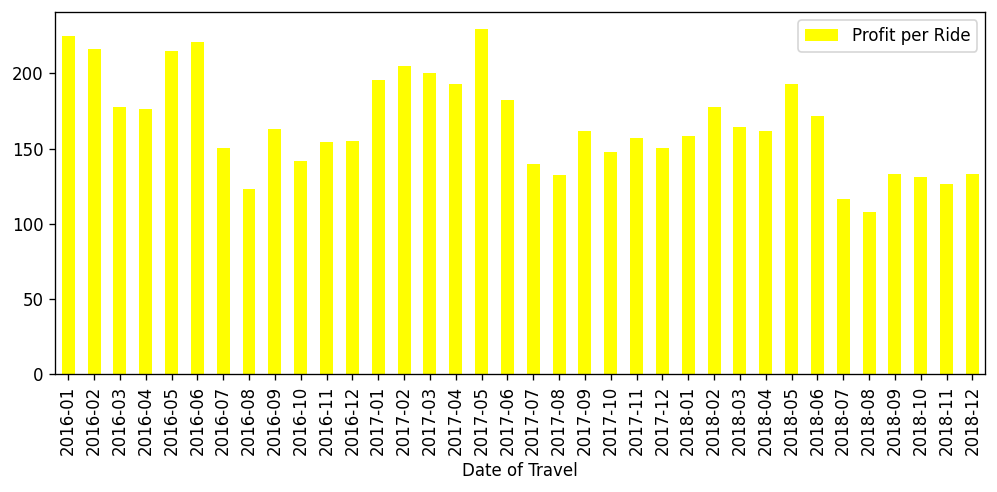

In [112]:
df_profit_yellow.plot(x="Date of Travel", y="Profit per Ride", kind="bar", color="yellow", figsize=(10,4))

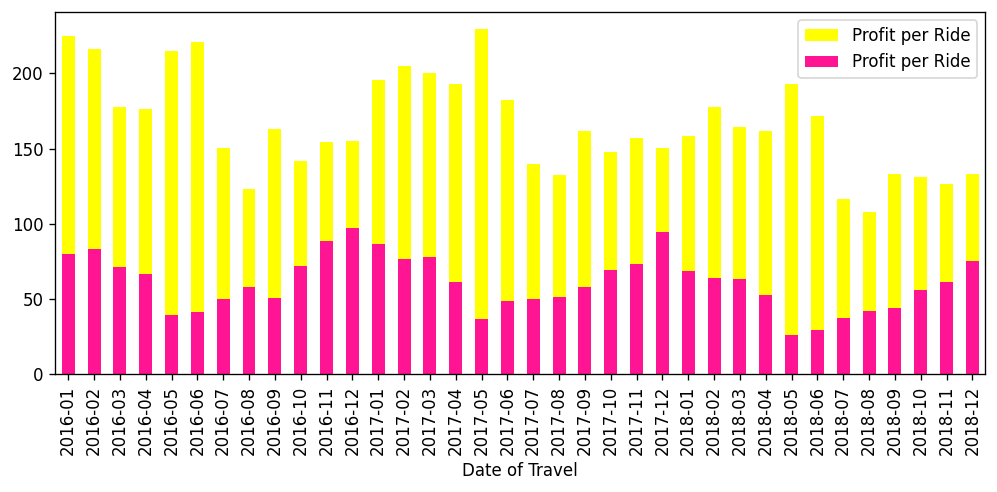

In [113]:
ax=df_profit_yellow.plot(x="Date of Travel", y="Profit per Ride", kind="bar", color="yellow", figsize=(10,4))
df_profit_pink.plot(ax=ax,x="Date of Travel", y="Profit per Ride", kind="bar", color="deeppink", figsize=(10,4))

In [114]:
print("Average profit per ride for Yellow cabs: ")
print(df_profit_yellow["Profit per Ride"].mean())
print("Average profit per ride for Pink cabs: ")
print(df_profit_pink["Profit per Ride"].mean())

print("Ratio between them Yellows/Pinks: ")
print(df_profit_yellow["Profit per Ride"].mean()/df_profit_pink["Profit per Ride"].mean())

Average profit per ride for Yellow cabs: 
166.26542650880495
Average profit per ride for Pink cabs: 
61.18036911204889
Ratio between them Yellows/Pinks: 
2.7176270578606325


In [115]:
df_km_yellow= df_master[df_master['Company'] == "Yellow Cab"][["Date of Travel","KM Travelled"]]
df_km_yellow["Date of Travel"]=df_km_yellow["Date of Travel"].apply(remove_day)
df_km_yellow=df_km_yellow.groupby(df_km_yellow["Date of Travel"]).sum()
df_km_yellow=pd.DataFrame(df_km_yellow)
df_km_yellow = df_km_yellow.rename_axis('Date of Travel').reset_index()

df_profit_yellow=df_profit_yellow.merge(df_km_yellow, on="Date of Travel", how="inner")

df_profit_yellow["Profit per KM travelled"]=df_profit_yellow.apply(lambda row: row["Profit"] / row["KM Travelled"], axis=1)
df_profit_yellow.head()

,Date of Travel,Profit,Number of Passengers,Year,Month,Profit per Ride,KM Travelled,Profit per KM travelled
0,2016-01,8.363081e+05,3719,2016,01,224.874458,84603.65,9.885012
1,2016-02,1.009169e+06,4674,2016,02,215.911248,105302.33,9.583541
2,2016-03,9.147648e+05,5146,2016,03,177.762298,117491.88,7.785770
3,2016-04,9.461364e+05,5360,2016,04,176.517989,121806.35,7.767546
4,2016-05,1.282773e+06,5967,2016,05,214.977948,133638.34,9.598843


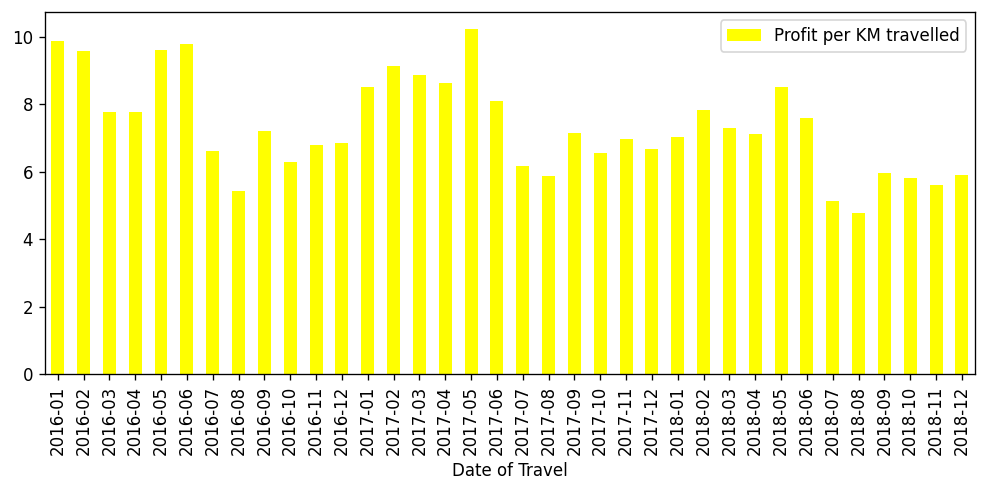

In [116]:
df_profit_yellow.plot(x="Date of Travel", y="Profit per KM travelled", kind="bar", color="yellow", figsize=(10,4))

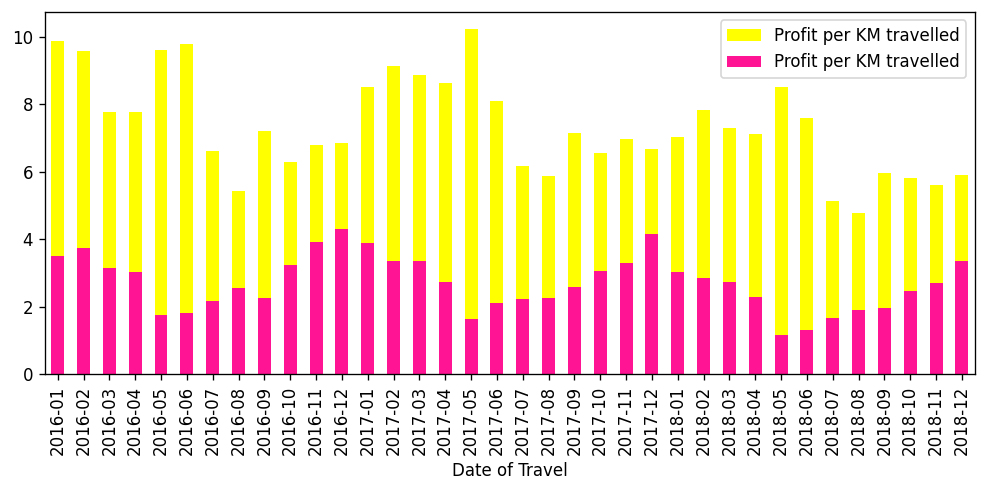

In [117]:
ax=df_profit_yellow.plot(x="Date of Travel", y="Profit per KM travelled", kind="bar", color="yellow", figsize=(10,4))
df_profit_pink.plot(ax=ax,x="Date of Travel", y="Profit per KM travelled", kind="bar", color="deeppink", figsize=(10,4))

In [118]:
print("Average profit per Km that travelled for Yellow cabs: ")
print(df_profit_yellow["Profit per KM travelled"].mean())
print("Average profit per Km that travelled for Pink cabs: ")
print(df_profit_pink["Profit per KM travelled"].mean())

print("Ratio between them Yellows/Pinks: ")
print(df_profit_yellow["Profit per KM travelled"].mean()/df_profit_pink["Profit per KM travelled"].mean())

Average profit per Km that travelled for Yellow cabs: 
7.364054544030935
Average profit per Km that travelled for Pink cabs: 
2.710543771122518
Ratio between them Yellows/Pinks: 
2.7168181611696527


# Rides in the US holidays

In [119]:
df_master[["Holiday"]]=df_master[["Holiday"]].fillna("Not Holiday")
df_master.isnull().sum()

Transaction ID             0
Date of Travel             0
Company                    0
City                       0
KM Travelled               0
Price Charged              0
Cost of Trip               0
Holiday                    0
WeekDay               340748
Month                 340748
Day                   340748
Year                  340748
Population                 0
Users                      0
Customer ID                0
Payment_Mode               0
Gender                     0
Age                        0
Income (USD/Month)         0
Profit                     0
dtype: int64

In [120]:
df_holiday=df_master.groupby("Holiday")["Users"].count()
df_holiday=pd.DataFrame(df_holiday)
df_holiday.drop("Not Holiday", axis=0, inplace=True)
df_holiday = df_holiday.rename_axis('Holiday').reset_index()
df_holiday.head()

,Holiday,Users
0,4th of July,447
1,Christmas Day,1331
2,Christmas Eve,2011
3,Columbus Day,673
4,Eastern Easter,1040


In [121]:
df_holiday= df_holiday.sort_values('Users')
df_holiday.head()

,Holiday,Users
8,"Martin Luther King, Jr. Day",325
16,Washington's Birthday,345
0,4th of July,447
9,Memorial Day,449
14,Valentine’s Day,656


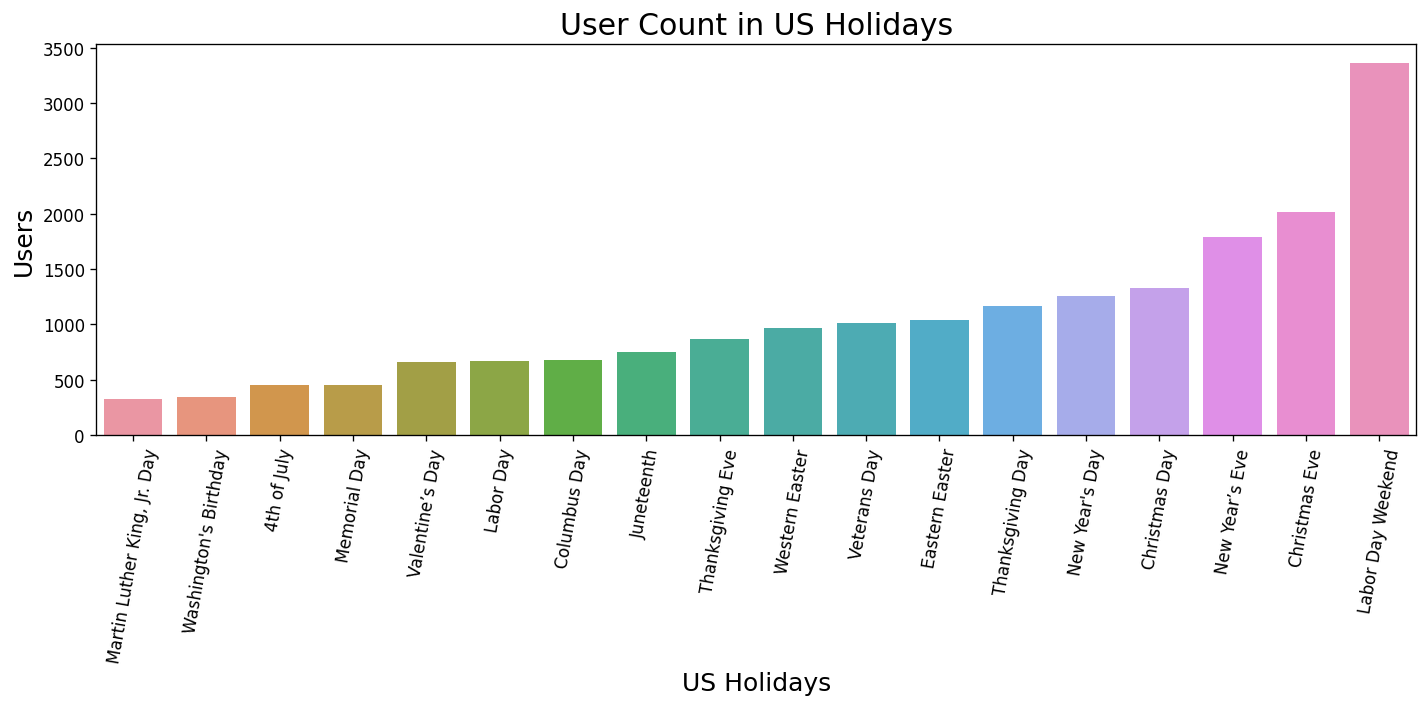

In [122]:
plt.figure(figsize=(12,6))
# make barplot and sort bars
sns.barplot(x='Holiday',
            y="Users", 
            data=df_holiday, 
            order=df_holiday.sort_values('Users').Holiday)
# set labels
plt.xlabel("US Holidays", size=15)
plt.xticks(rotation=80)
plt.ylabel("Users", size=15)
plt.title("User Count in US Holidays", size=18)
plt.tight_layout()

In [123]:
rslt_df = df_master[df_master['Company'] == "Pink Cab"] 
df_holiday_pink=rslt_df.groupby("Holiday")["Users"].count()
df_holiday_pink=pd.DataFrame(df_holiday_pink)
df_holiday_pink.drop("Not Holiday", axis=0, inplace=True)
df_holiday_pink = df_holiday_pink.rename_axis('Holiday').reset_index()
df_holiday_pink.head()

,Holiday,Users
0,4th of July,108
1,Christmas Day,337
2,Christmas Eve,480
3,Columbus Day,188
4,Eastern Easter,187


In [124]:
rslt_df = df_master[df_master['Company'] == "Yellow Cab"] 
df_holiday_yellow=rslt_df.groupby("Holiday")["Users"].count()
df_holiday_yellow=pd.DataFrame(df_holiday_yellow)
df_holiday_yellow.drop("Not Holiday", axis=0, inplace=True)
df_holiday_yellow = df_holiday_yellow.rename_axis('Holiday').reset_index()
df_holiday_yellow.head()

,Holiday,Users
0,4th of July,339
1,Christmas Day,994
2,Christmas Eve,1531
3,Columbus Day,485
4,Eastern Easter,853


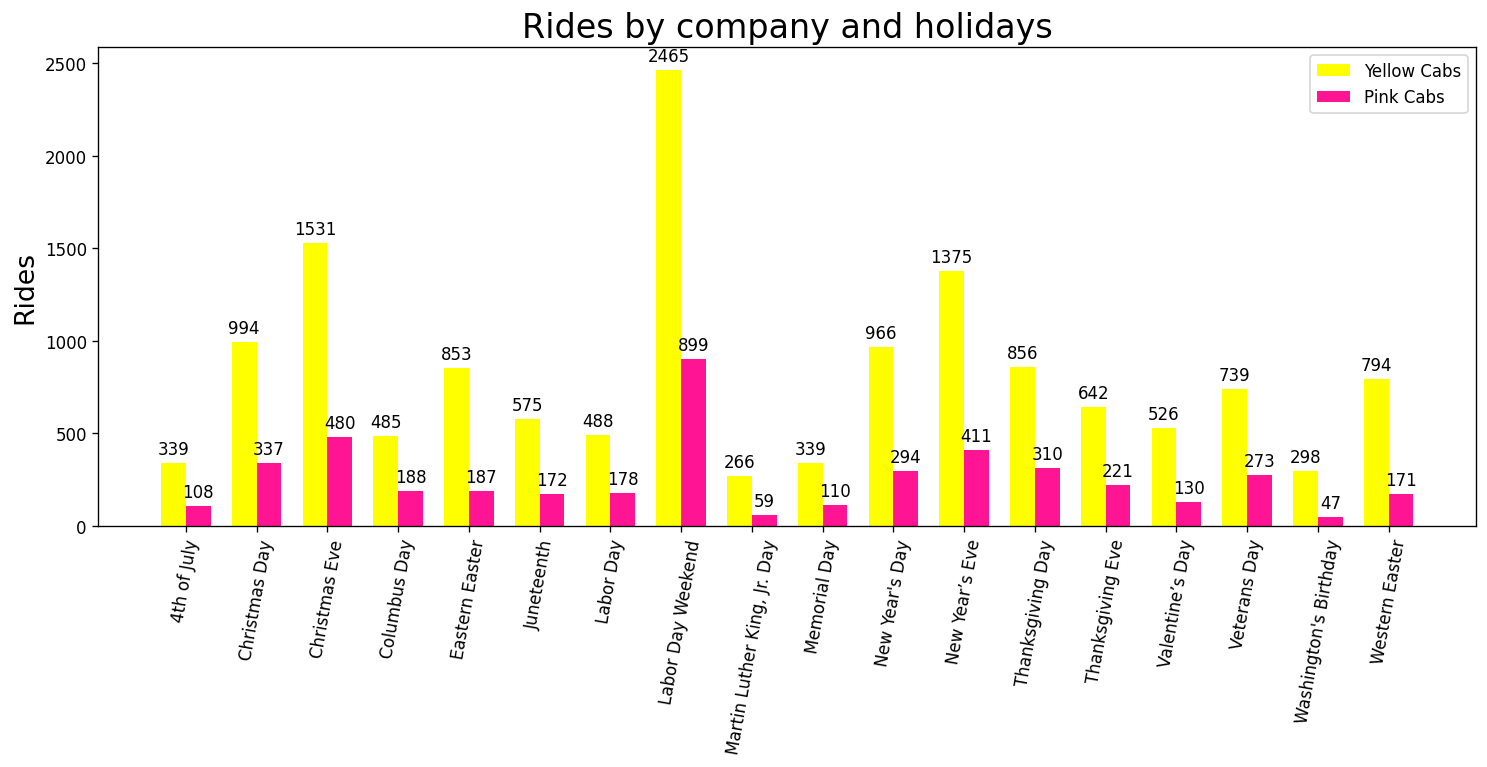

In [125]:
yellow_rides = df_holiday_yellow['Users'].tolist()
pink_rides = df_holiday_pink['Users'].tolist()
labels=df_holiday_pink['Holiday'].tolist()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
rects1 = ax.bar(x - width/2, yellow_rides, width, label='Yellow Cabs',color="yellow")
rects2 = ax.bar(x + width/2, pink_rides, width, label='Pink Cabs',color="deeppink")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rides',size=16)
ax.set_title('Rides by company and holidays',size=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=80)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Analyses according to age and income


In [126]:
def fill_month_column(x):
  return(str(x)[5:7])


df_master["Month"]=df_master["Date of Travel"].apply(fill_month_column)

def fill_day_column(x):
  return(str(x)[8:])


df_master["Day"]=df_master["Date of Travel"].apply(fill_day_column)

def fill_year_column(x):
  return(str(x)[:4])


df_master["Year"]=df_master["Date of Travel"].apply(fill_year_column)

df_master.drop('WeekDay', axis=1, inplace=True)

In [127]:
df_master.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Holiday               0
Month                 0
Day                   0
Year                  0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Profit                0
dtype: int64

In [128]:
bins= [18,26,41,61,100]
labels = ['18-25','26-40','41-60','60+']
df_master['AgeGroup'] = pd.cut(df_master['Age'], bins=bins, labels=labels, right=False)


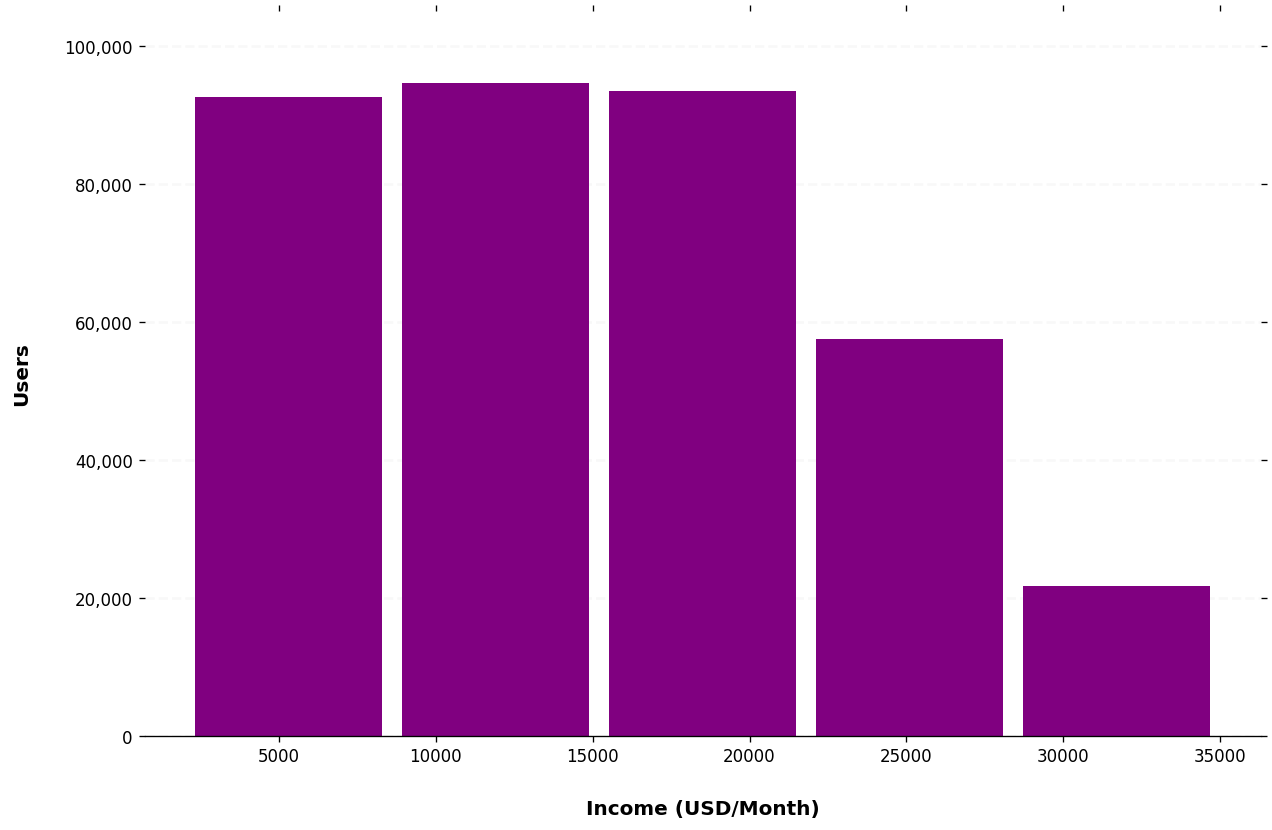

In [129]:
ax = df_master.hist(column='Income (USD/Month)', bins=5, grid=False, figsize=(12,8), color='purple', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Income (USD/Month)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Users", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [130]:
df_master["Income (USD/Month)"].min()

2000

In [131]:
bins= [2000,10000,20000,35000]
labels = ['2k-10k','10k-20k','20k+']
df_master['IncomeGroup'] = pd.cut(df_master['Income (USD/Month)'], bins=bins, labels=labels, right=False)
df_master.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Holiday,Month,Day,...,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,AgeGroup,IncomeGroup
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Not Holiday,01,08,...,"814,885","24,701",29290,Card,Male,28,10813,57.315,26-40,10k-20k
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Not Holiday,01,06,...,"814,885","24,701",27703,Card,Male,27,9237,23.666,26-40,2k-10k
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Not Holiday,01,02,...,"814,885","24,701",28712,Cash,Male,53,11242,27.568,41-60,10k-20k
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Not Holiday,01,07,...,"814,885","24,701",28020,Cash,Male,23,23327,25.798,18-25,20k+
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Not Holiday,01,03,...,"814,885","24,701",27182,Card,Male,33,8536,16.844,26-40,2k-10k


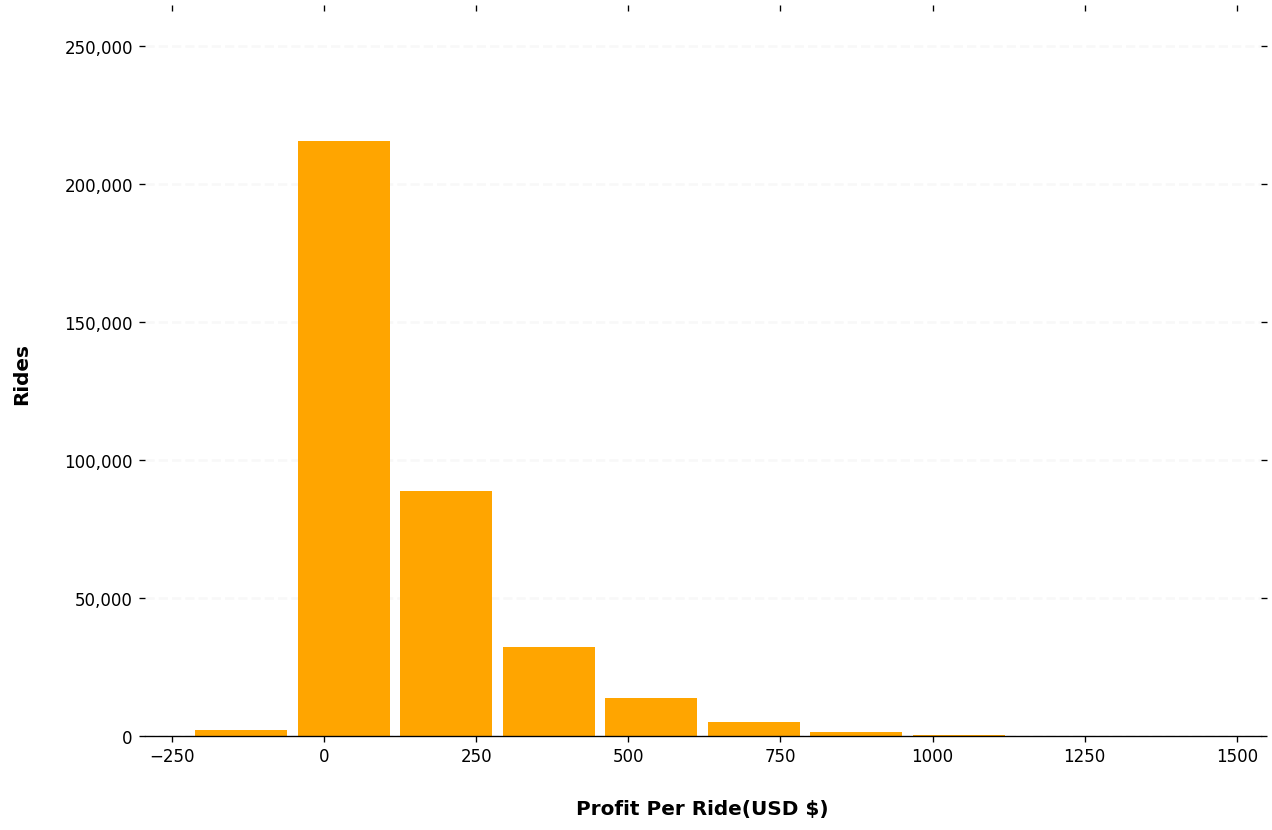

In [132]:
ax = df_master.hist(column='Profit', bins=10, grid=False, figsize=(12,8), color='orange', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Profit Per Ride(USD $)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Rides", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [133]:
df_age_year=df_master.groupby(['Company','AgeGroup',"Year"])['Transaction ID'].agg(['count'])

In [134]:
df_age_year

count
Company    AgeGroup Year       
Pink Cab   18-25    2016   6450
                    2017   8086
                    2018   7604
           26-40    2016  11898
                    2017  14270
                    2018  13855
           41-60    2016   5341
                    2017   6421
                    2018   6270
           60+      2016   1391
                    2017   1618
                    2018   1581
Yellow Cab 18-25    2016  21183
                    2017  25649
                    2018  24493
           26-40    2016  39052
                    2017  46402
                    2018  44531
           41-60    2016  17705
                    2017  21405
                    2018  20306
           60+      2016   4299
                    2017   5121
                    2018   4923

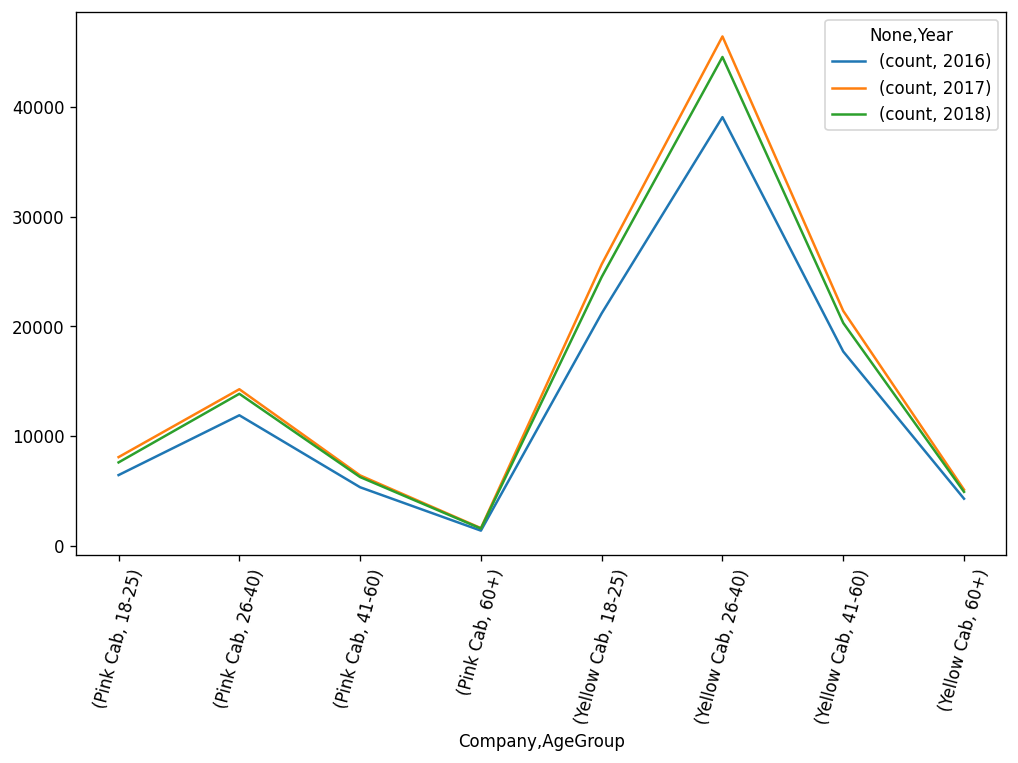

<Figure size 120x120 with 0 Axes>

In [138]:
df_age_year.unstack().plot()
plt.xticks(rotation=75)
plt.show()

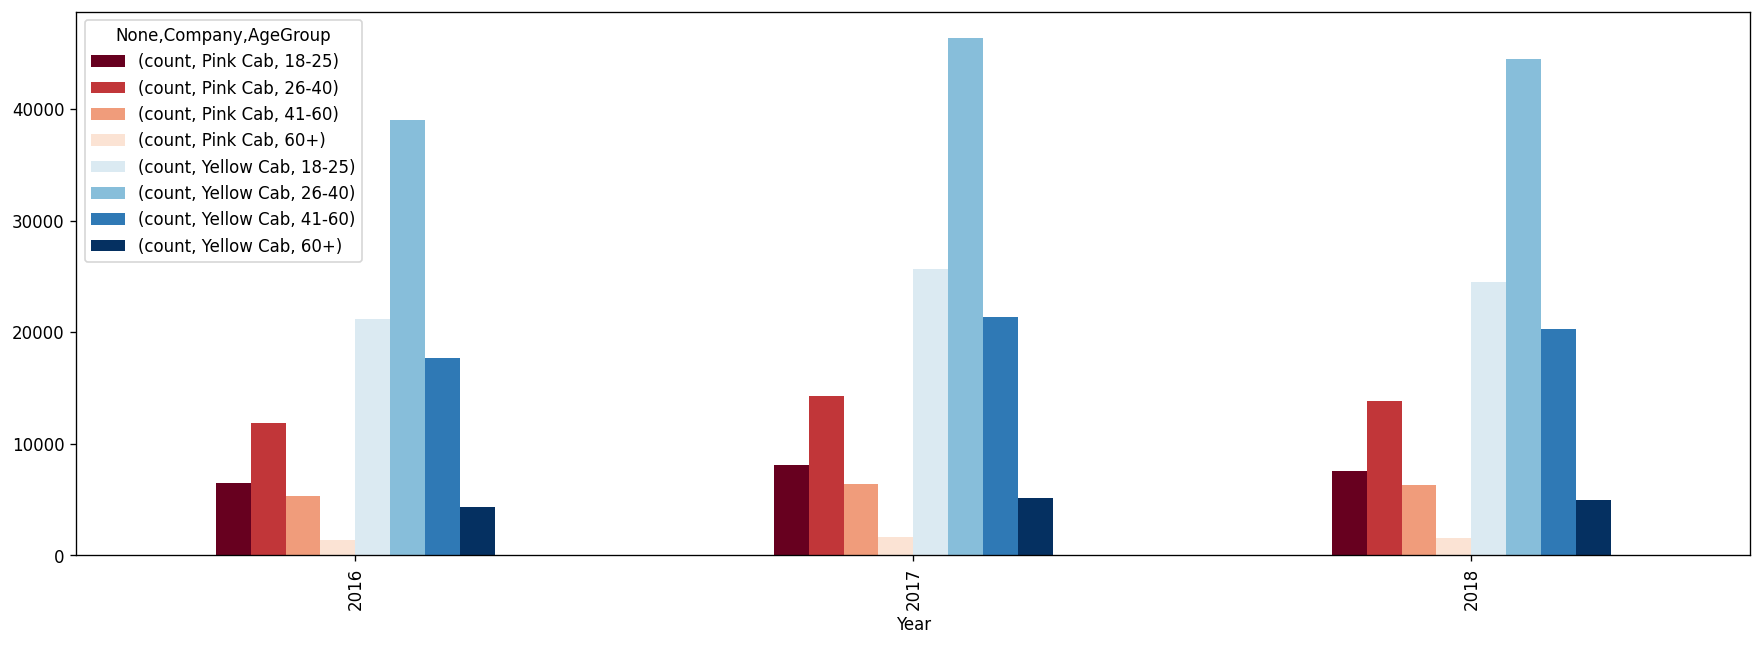

In [139]:
df_age_year.unstack('Company').unstack("AgeGroup").plot.bar(figsize=(18,6),colormap='RdBu')

In [140]:
df_customer_rides=pd.DataFrame(df_master.groupby("Customer ID").count()["Transaction ID"])
df_customer_rides = df_customer_rides.rename_axis('Customer ID').reset_index()
df_customer_rides.rename(columns = {'Transaction ID':'Rides'}, inplace = True)
df_customer_rides.drop_duplicates(keep = "first", inplace = True)
df_customer_rides.head()

,Customer ID,Rides
0,1,29
1,2,40
2,3,46
3,4,26
4,5,31


In [141]:
df_customer_rides=df_customer_rides.merge(df_master[["Age","Customer ID"]], on="Customer ID", how="inner")

In [142]:
df_customer_rides.drop_duplicates(keep = "first", inplace = True)
df_customer_rides.head()

,Customer ID,Rides,Age
0,1,29,36
29,2,40,31
69,3,46,27
115,4,26,33
141,5,31,24


In [143]:
print(df_customer_rides['Rides'].corr(df_customer_rides['Age']))

-0.0014794722189369958


**Correlation between rides number(customer retention) of customers and their age is very low and also negative as well. So lets look at its visual form**

In [144]:
df_customer_rides = df_customer_rides[df_customer_rides.Rides >= 30]
df_customer_rides.head()

,Customer ID,Rides,Age
29,2,40,31
69,3,46,27
141,5,31,24
200,7,36,31
236,8,35,20


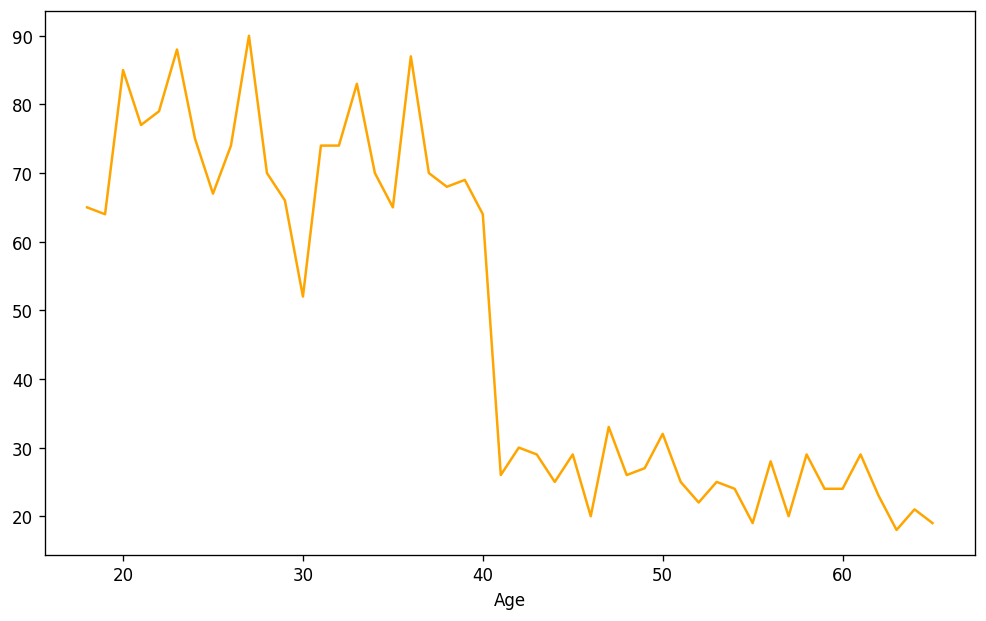

In [145]:
#Customers amount that used cabs more than 30 times in given 3 years according to their age
df_customer_rides.groupby("Age").count()["Rides"].plot(color="orange")

**There is no trend or evident correlation but we can see that at the age of 40 there is a change significant change in customer retention which also can be grouped liked below 40 and above 40.**

In [146]:
df_income_year=df_master.groupby(['Company','IncomeGroup',"Year"])['Transaction ID'].agg(['count'])
df_income_year

count
Company    IncomeGroup Year       
Pink Cab   2k-10k      2016   7841
                       2017   9552
                       2018   9326
           10k-20k     2016   9892
                       2017  11976
                       2018  11438
           20k+        2016   7346
                       2017   8867
                       2018   8546
Yellow Cab 2k-10k      2016  25747
                       2017  30753
                       2018  29615
           10k-20k     2016  32795
                       2017  39022
                       2018  37525
           20k+        2016  23697
                       2017  28802
                       2018  27113

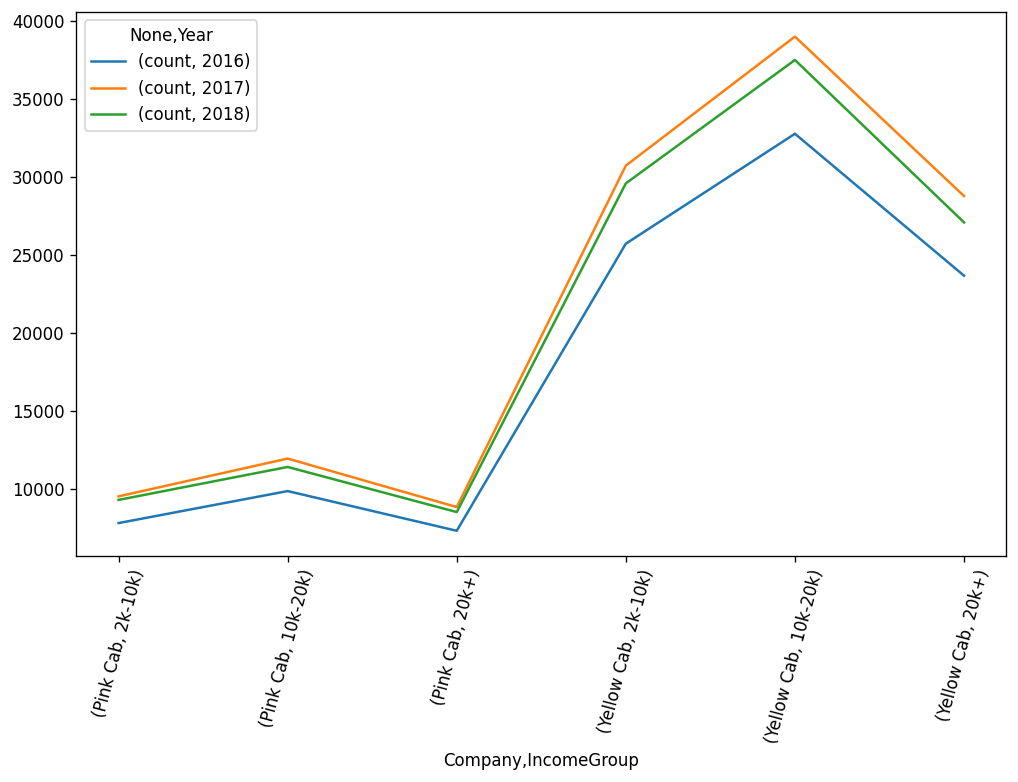

In [147]:
df_income_year.unstack().plot()
plt.xticks(rotation=75)
plt.show()

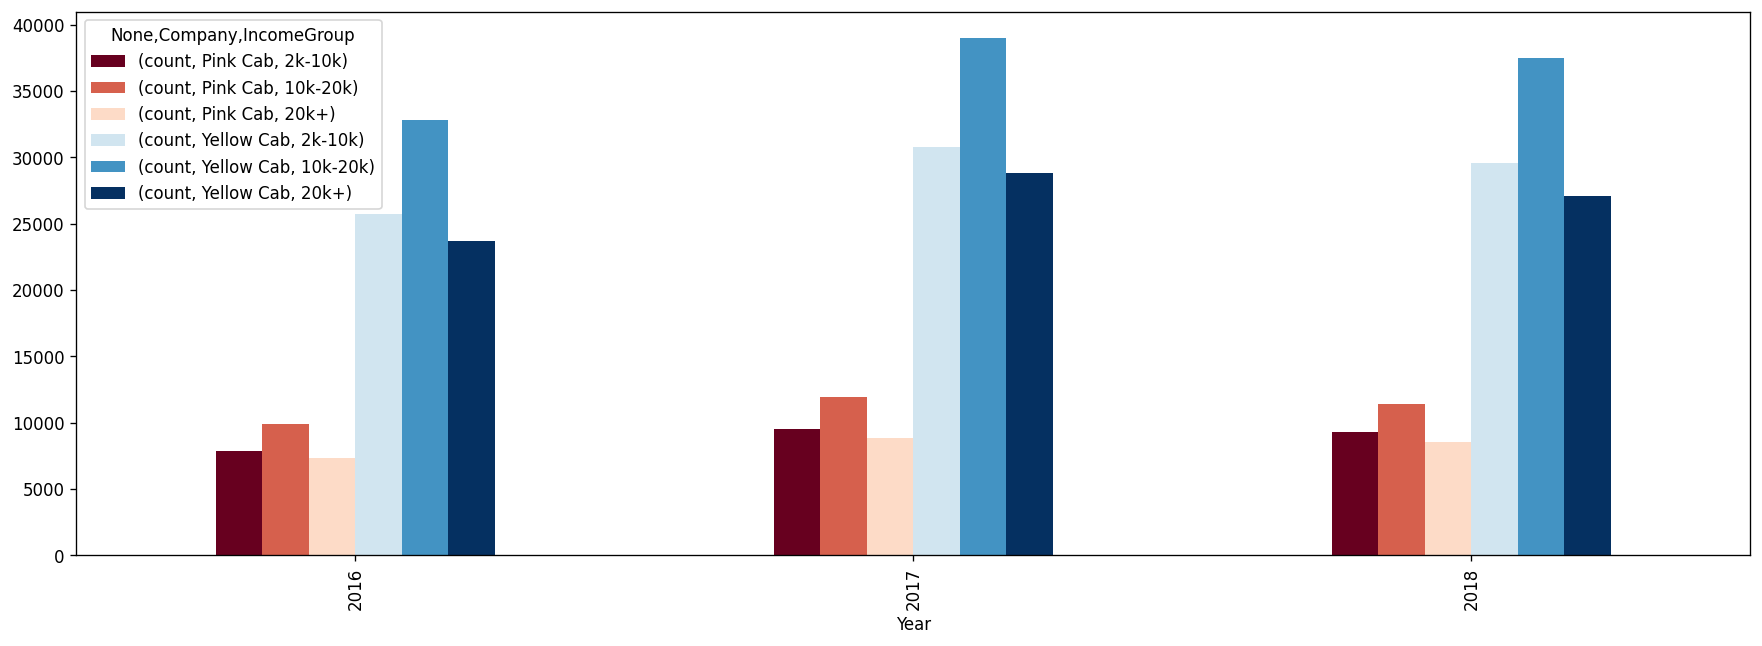

In [148]:
df_income_year.unstack('Company').unstack("IncomeGroup").plot.bar(figsize=(18,6),colormap='RdBu')

In [149]:
df_customer_rides=pd.DataFrame(df_master.groupby("Customer ID").count()["Transaction ID"])
df_customer_rides = df_customer_rides.rename_axis('Customer ID').reset_index()
df_customer_rides.rename(columns = {'Transaction ID':'Rides'}, inplace = True)
df_customer_rides=df_customer_rides.merge(df_master[["Income (USD/Month)","Customer ID"]], on="Customer ID", how="inner")
df_customer_rides.drop_duplicates(keep = "first", inplace = True)
df_customer_rides.head()

,Customer ID,Rides,Income (USD/Month)
0,1,29,16359
29,2,40,12069
69,3,46,12968
115,4,26,13803
141,5,31,9965


In [150]:
print(df_customer_rides['Rides'].corr(df_customer_rides['Income (USD/Month)']))

0.00532930495164672


**Correlation between rides number(customer retention) of customers and their income is very very low but positive. So lets look at its visual form**

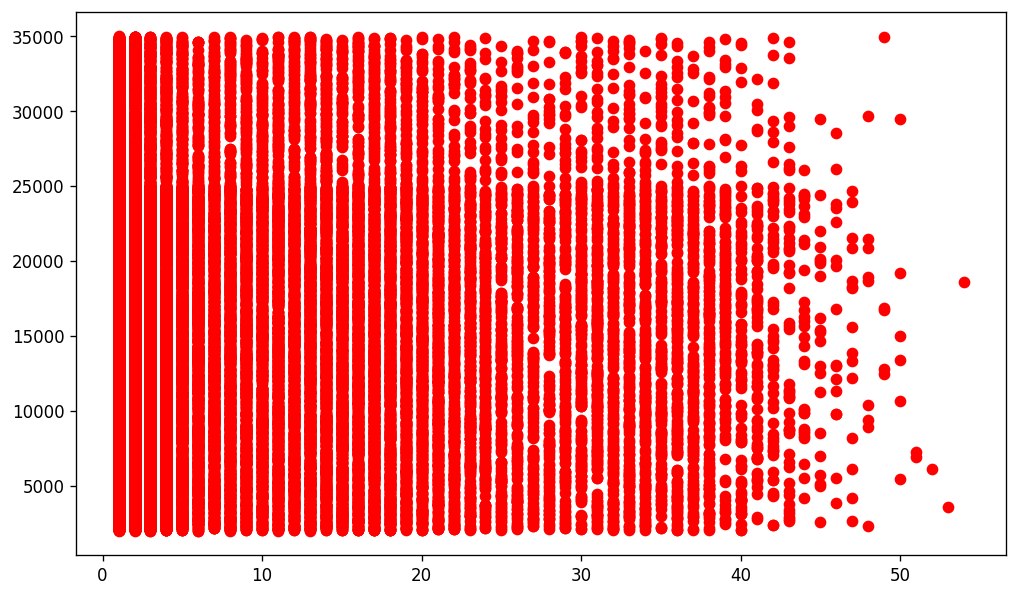

In [151]:
plt.scatter(df_customer_rides["Rides"],df_customer_rides["Income (USD/Month)"],color ="red")

**As we can see there is no correlation between income level and customer retention.**

# Retention of customers vs Gender

In [153]:
df_customer_rides=pd.DataFrame(df_master.groupby("Customer ID").count()["Transaction ID"])
df_customer_rides = df_customer_rides.rename_axis('Customer ID').reset_index()
df_customer_rides.rename(columns = {'Transaction ID':'Rides'}, inplace = True)
df_customer_rides=df_customer_rides.merge(df_master[["Gender","Customer ID"]], on="Customer ID", how="inner")
df_customer_rides.drop_duplicates(keep = "first", inplace = True)
df_customer_rides.head()

,Customer ID,Rides,Gender
0,1,29,Male
29,2,40,Male
69,3,46,Female
115,4,26,Male
141,5,31,Male


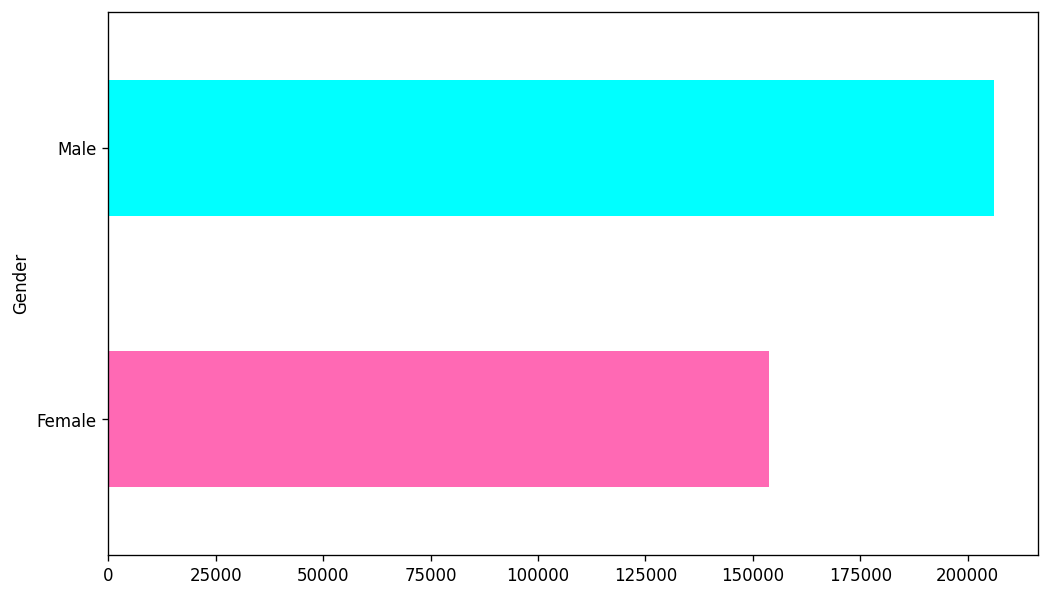

In [154]:
df_customer_rides.groupby("Gender")["Rides"].sum().plot(kind='barh', color=['hotpink', 'cyan'])

In [155]:
data=pd.DataFrame(df_customer_rides.groupby("Gender")["Rides"].sum())
df = data.rename_axis('Gender').reset_index()
df

,Gender,Rides
0,Female,153684
1,Male,206170


In [157]:
df_t = df.T
df_t.columns=["Female","Male"]
df_t.drop("Gender", axis=0, inplace=True)
print(df_t)

       Female    Male
Rides  153684  206170


**Every rides according to gender**

In [158]:
df_customer_rides_10 = df_customer_rides[df_customer_rides.Rides >= 10]
df_customer_rides_10=pd.DataFrame(df_customer_rides_10.groupby("Gender")["Rides"].sum())
df_customer_rides_10 = df_customer_rides_10.rename_axis('Gender').reset_index()
df_t10 = df_customer_rides_10.T
df_t10.columns=["Female","Male"]
df_t10.drop("Gender", axis=0, inplace=True)
print(df_t10)

       Female    Male
Rides  110252  159552


**Customers who took 10 or more rides in 3 years according to their gender**

In [159]:
df_customer_rides_20 = df_customer_rides[df_customer_rides.Rides >= 20]
df_customer_rides_20=pd.DataFrame(df_customer_rides_20.groupby("Gender")["Rides"].sum())
df_customer_rides_20 = df_customer_rides_20.rename_axis('Gender').reset_index()
df_t20 = df_customer_rides_20.T
df_t20.columns=["Female","Male"]
df_t20.drop("Gender", axis=0, inplace=True)
print(df_t20)

      Female   Male
Rides  58476  90271


**Customers who took 20 or more rides in 3 years according to their gender**

In [160]:
df_customer_rides_30 = df_customer_rides[df_customer_rides.Rides >= 30]
df_customer_rides_30=pd.DataFrame(df_customer_rides_30.groupby("Gender")["Rides"].sum())
df_customer_rides_30 = df_customer_rides_30.rename_axis('Gender').reset_index()
df_t30 = df_customer_rides_30.T
df_t30.columns=["Female","Male"]
df_t30.drop("Gender", axis=0, inplace=True)
print(df_t30)

      Female   Male
Rides  32162  49803


**Customers who took 30 or more rides in 3 years according to their gender**

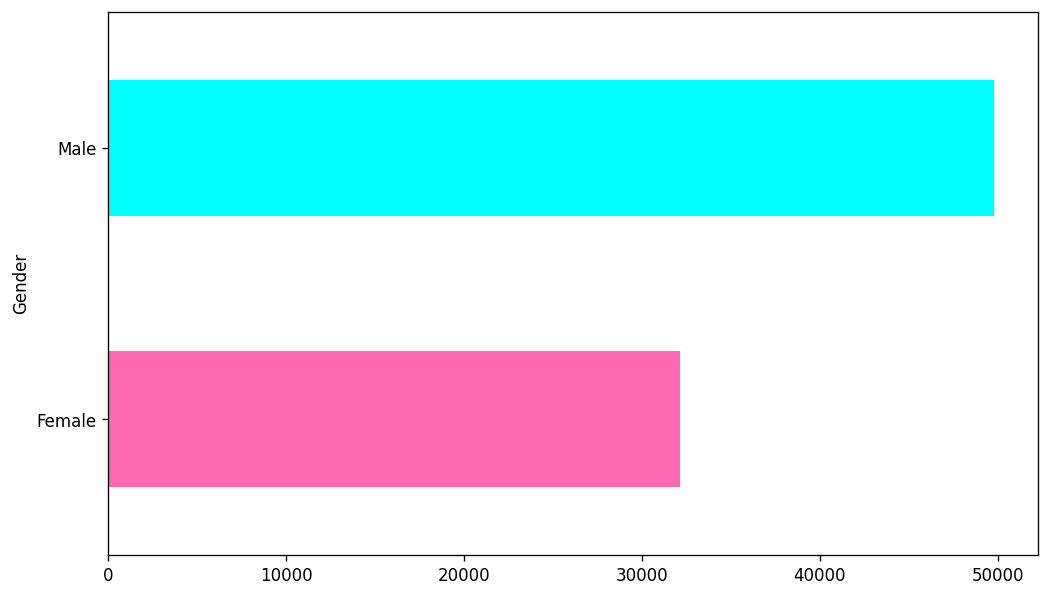

In [161]:
df_customer_rides = df_customer_rides[df_customer_rides.Rides >= 30]
df_customer_rides.groupby("Gender")["Rides"].sum().plot(kind='barh', color=['hotpink', 'cyan'])

In [162]:
df_t30=df_t30.append(df_t20, ignore_index = True)
df_t30=df_t30.append(df_t10, ignore_index = True)
df_t30=df_t30.append(df_t, ignore_index = True)
df_t30

,Female,Male
0,32162,49803
1,58476,90271
2,110252,159552
3,153684,206170


In [163]:
df_t30_prop = df_t30.div(df_t30.sum(axis=1), axis=0)
df_t30_prop

,Female,Male
0,0.392387,0.607613
1,0.393124,0.606876
2,0.408637,0.591363
3,0.427073,0.572927


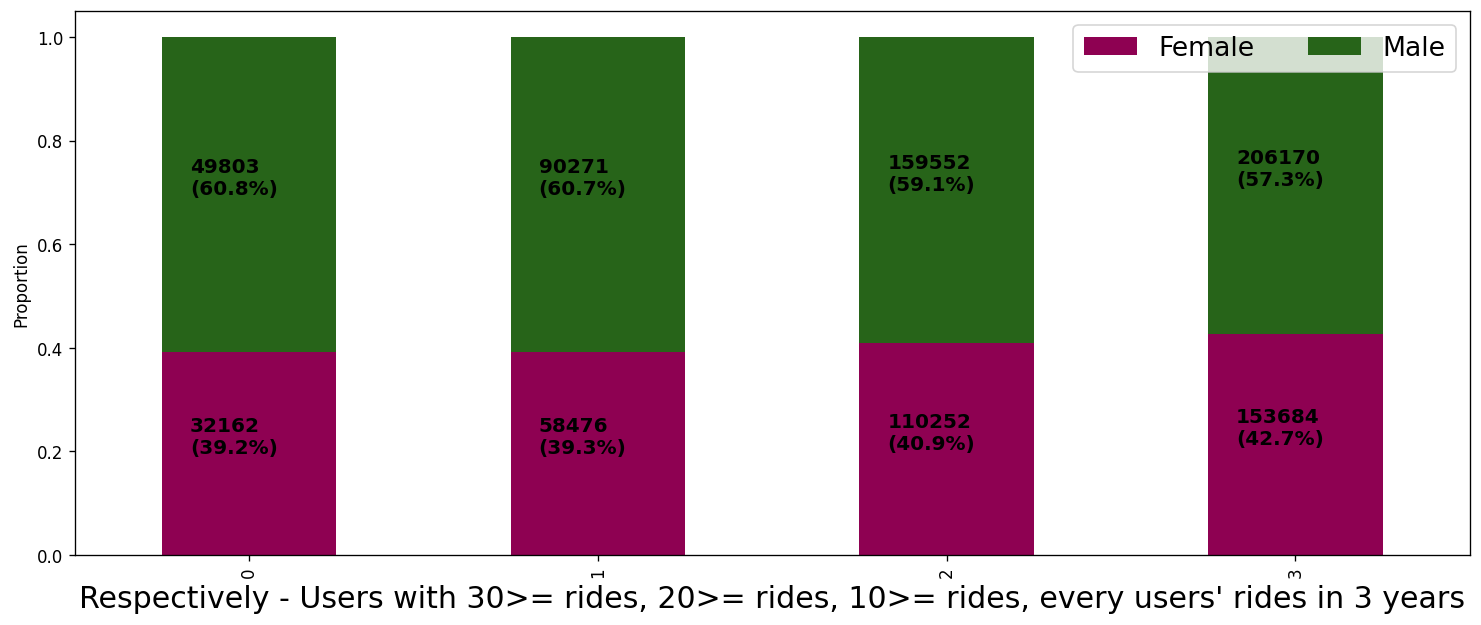

In [164]:
df_t30_prop.plot(kind='bar', 
                        stacked=True, 
                        colormap='PiYG', 
                        figsize=(15, 6))

plt.legend(loc="upper right", ncol=2, prop={'size': 16})
plt.xlabel("Respectively - Users with 30>= rides, 20>= rides, 10>= rides, every users' rides in 3 years", fontsize=18)
plt.ylabel("Proportion")


for n, x in enumerate([*df_t30.index.values]):
    for (proportion, count, y_loc) in zip(df_t30_prop.loc[x],
                                          df_t30.loc[x],
                                          df_t30_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

**As we can see if we filter users by their retention to these two firms by their gender, there is almost no change in proportion of gender distribution**

In [165]:
df_master.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Holiday,Month,Day,...,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,AgeGroup,IncomeGroup
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Not Holiday,01,08,...,"814,885","24,701",29290,Card,Male,28,10813,57.315,26-40,10k-20k
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Not Holiday,01,06,...,"814,885","24,701",27703,Card,Male,27,9237,23.666,26-40,2k-10k
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Not Holiday,01,02,...,"814,885","24,701",28712,Cash,Male,53,11242,27.568,41-60,10k-20k
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Not Holiday,01,07,...,"814,885","24,701",28020,Cash,Male,23,23327,25.798,18-25,20k+
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Not Holiday,01,03,...,"814,885","24,701",27182,Card,Male,33,8536,16.844,26-40,2k-10k


# Some t_test for testing some hypotheses 

## Testing for payment method and age relation

### Yellow Cabs

In [166]:
a = df_master[(df_master['Payment_Mode']=='Cash')&(df_master.Company=='Yellow Cab')].groupby('Transaction ID')["Age"].mean()
b = df_master[(df_master['Payment_Mode']=='Card')&(df_master.Company=='Yellow Cab')].groupby('Transaction ID')["Age"].mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab')

P value is  0.9289830216154131
We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab


### Pink Cabs

In [167]:
a = df_master[(df_master['Payment_Mode']=='Cash')&(df_master.Company=='Pink Cab')].groupby('Transaction ID')["Age"].mean()
b = df_master[(df_master['Payment_Mode']=='Card')&(df_master.Company=='Pink Cab')].groupby('Transaction ID')["Age"].mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab')

P value is  0.22484635646681664
We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab


## Testing for payment method and income relation

### Yellow Cabs

In [169]:
a = df_master[(df_master['Payment_Mode']=='Cash')&(df_master.Company=='Yellow Cab')].groupby('Transaction ID')["Income (USD/Month)"].mean()
b = df_master[(df_master['Payment_Mode']=='Card')&(df_master.Company=='Yellow Cab')].groupby('Transaction ID')["Income (USD/Month)"].mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab')

P value is  0.7814098586405054
We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab


### Pink Cabs

In [168]:
a = df_master[(df_master['Payment_Mode']=='Cash')&(df_master.Company=='Pink Cab')].groupby('Transaction ID')["Income (USD/Month)"].mean()
b = df_master[(df_master['Payment_Mode']=='Card')&(df_master.Company=='Pink Cab')].groupby('Transaction ID')["Income (USD/Month)"].mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab')

P value is  0.5693372553138271
We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab


## Testing for Profits per distance(KM) and Age

In [170]:
df_master["Profit per KM travelled"]=df_master.apply(lambda row: row["Profit"] / row["KM Travelled"], axis=1)

### Yellow Cabs

In [175]:
a = df_master[(df_master.Age <= 40)&(df_master.Company=='Yellow Cab')].groupby('Transaction ID')["Profit per KM travelled"].mean()
b = df_master[(df_master.Age > 40)&(df_master.Company=='Yellow Cab')].groupby('Transaction ID')["Profit per KM travelled"].mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding being younger/older than 40 years old for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding being younger/older than 40 years old for Yellow Cab')

201029 73652
P value is  0.4681542398451294
We accept null hypothesis (H0) that there is no difference regarding being younger/older than 40 years old for Yellow Cab


In [176]:
print(a.mean())
print(b.mean())

7.110359756927583
7.0922646870530714


In [177]:
a = df_master[(df_master.Age <= 60)&(df_master.Company=='Yellow Cab')].groupby('Transaction ID')["Profit per KM travelled"].mean()
b = df_master[(df_master.Age > 60)&(df_master.Company=='Yellow Cab')].groupby('Transaction ID')["Profit per KM travelled"].mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding being younger/older than 60 years old for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding being younger/older than 60 years old for Yellow Cab')

260356 14325
P value is  2.8595817620394363e-09
We accept alternative hypothesis (H1) that there is a difference regarding being younger/older than 60 years old for Yellow Cab


In [181]:
print(a.mean())
print(b.mean())
print("Difference between profits per KM that are traveled for the people that older or younger 60 years old: ")
print(a.mean()-b.mean())
print("Average KM traveled in one ride: ")
df_master["KM Travelled"].mean()

7.1209007443410774
6.825742137002093
Difference between profits per KM that are traveled for the people that older or younger 60 years old: 
0.29515860733898425
Average KM traveled in one ride: 


22.567304351209422

Even it seems there is not significant profit difference between rides of older people when we look at the rides by their "per KM", if we multiply by average distance 22.5 KM with 0.3, almost 7$ profits are changing for yellow cabs.

### Pink Cabs

In [173]:
a = df_master[(df_master.Age <= 60)&(df_master.Company=='Pink Cab')].groupby('Transaction ID')["Profit per KM travelled"].mean()
b = df_master[(df_master.Age > 60)&(df_master.Company=='Pink Cab')].groupby('Transaction ID')["Profit per KM travelled"].mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding being younger/older than 60 years old for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding being younger/older than 60 years old for Pink Cab')

80125 4586
P value is  0.29876363548223495
We accept null hypothesis (H0) that there is no difference regarding being younger/older than 60 years old for Pink Cab


In [174]:
print(a.mean())
print(b.mean())

2.7722114382834064
2.7296575917644916


In [171]:
a = df_master[(df_master.Age <= 40)&(df_master.Company=='Pink Cab')].groupby('Transaction ID')["Profit per KM travelled"].mean()
b = df_master[(df_master.Age > 40)&(df_master.Company=='Pink Cab')].groupby('Transaction ID')["Profit per KM travelled"].mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding being younger/older than 40 years old for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding being younger/older than 40 years old for Pink Cab')

62109 22602
P value is  0.3279797512777134
We accept null hypothesis (H0) that there is no difference regarding being younger/older than 40 years old for Pink Cab


In [172]:
print(a.mean())
print(b.mean())

2.775376193442646
2.75488059506948


## Testing if there is a significant difference between average distance taken between two companies by the cities

In [188]:
a = df_master[(df_master.Company=='Pink Cab')].groupby('City')["KM Travelled"].mean()
b = df_master[(df_master.Company=='Yellow Cab')].groupby('City')["KM Travelled"].mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in distance taken between two companies by cities')
else:
    print('We accept null hypothesis (H0) that there is no difference in distance taken between two companies by cities')

P value is  0.11228278856829522
We accept null hypothesis (H0) that there is no difference in distance taken between two companies by cities


In [189]:
a #Pink Cabs average KM traveled in different cities

City
ATLANTA GA        22.528741
AUSTIN TX         21.962444
BOSTON MA         22.738131
CHICAGO IL        22.509438
DALLAS TX         22.021825
DENVER CO         22.445527
LOS ANGELES CA    22.638666
MIAMI FL          22.288962
NASHVILLE TN      22.523654
NEW YORK NY       22.622555
ORANGE COUNTY     22.216684
PHOENIX AZ        21.729457
PITTSBURGH PA     22.581613
SACRAMENTO CA     22.597070
SAN DIEGO CA      22.557712
SEATTLE WA        22.683923
SILICON VALLEY    22.787829
TUCSON AZ         22.535400
WASHINGTON DC     22.477418
Name: KM Travelled, dtype: float64

In [191]:
print(a.mean()) # average distance taken by Pink Cabs
print(b.mean()) # average distance taken by Yellow Cabs

22.44458151914108
22.571069106522714


## Testing if there is a significant difference between average age between two companies by the cities

In [192]:
a = df_master[(df_master.Company=='Pink Cab')].groupby('City')["Age"].mean()
b = df_master[(df_master.Company=='Yellow Cab')].groupby('City')["Age"].mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in ages between two companies by cities')
else:
    print('We accept null hypothesis (H0) that there is no difference in ages between two companies by cities')

P value is  0.6087873259587233
We accept null hypothesis (H0) that there is no difference in ages between two companies by cities


In [193]:
a #Pink Cabs average ages in different cities

City
ATLANTA GA        35.310658
AUSTIN TX         35.681818
BOSTON MA         35.181853
CHICAGO IL        35.612232
DALLAS TX         35.830558
DENVER CO         35.161290
LOS ANGELES CA    35.658602
MIAMI FL          36.080838
NASHVILLE TN      34.310532
NEW YORK NY       34.897095
ORANGE COUNTY     35.383091
PHOENIX AZ        35.432370
PITTSBURGH PA     35.695015
SACRAMENTO CA     35.754111
SAN DIEGO CA      35.010858
SEATTLE WA        35.156124
SILICON VALLEY    34.938947
TUCSON AZ         35.605000
WASHINGTON DC     35.437263
Name: Age, dtype: float64

In [194]:
print(a.mean()) # average age of customers that take ride for Pink Cabs
print(b.mean()) # average age of customers that take ride for Yellow Cabs

35.375697635786786
35.311460241512656
